# Political Troll Tweets Analysis: Russia
---

**<u>_Objective:_</u>** In this project, we perform exploratory data analysis on Russian, Chinese and Indonesian information operations, to uncover the trolls' tradecraft and modus operandi against a target populace. This analysis wil enable intelligence and security entities to recognize and disrupt trolls waging information warfare.

---
# **Business Understanding**
---

Information warfare (_information operations / influence operations / IO_) is defined as the collection of data, and circulation of propaganda to gain strategic advantage over an adversary. The most notible aspect of such operations is the dissemination of disinformation, to exploit existing societal grievances and divisions. These methods aim to sow discord and distrust, influence the population's beliefs and manipulate public perception, steering the messes toward a direction beneficial to the adversary. A common technique of information operatives is to abuse popular social media platforms such as Twitter, Facebook or Instagram that has a very large user base and reach.

With the success of the Russian Internet Research Agency (IRA) in meddling with the US presidential election of 2016, other state actors are learning of this success and slowly, incorporate IO tradecraft. Given the proliferation of IO, it is pertinent that the defense community learn to detect, disrupt and dismantle IO that seeks to forment socio-politcal change. This area is a core tenant of counterintelligence work. With the large dataset publicly available, one can conduct data-driven intelligence analysis on the IO tweets.

In this project, we conduct a series of exploratory data analysis (EDA) on three countries - Russia, China and Indonesia - to analyze state-linked IO tradecraft. By analysing the publicly available datasets released by Twitter, we gain insight into the different kinds of tradecraft exploited by state actors. The series of EDA notebooks is an example of data-driven intelligence analysis. Furthermore, policy makers can use this insight to make better, informed decisions on national security issues.

---
# **Data Understanding**
---

Russia appear most frequently in the IOA. Russia is known to frequently use traditional and social media to spread disinformation and propaganda. It is also widely known that Russia overseas a vast disinformation machinery, backed and sponsored handsomely by the state. Recently, the Microsoft Threat Analysis Center has published the following infograhic on russian state backed disinformation enterprise:

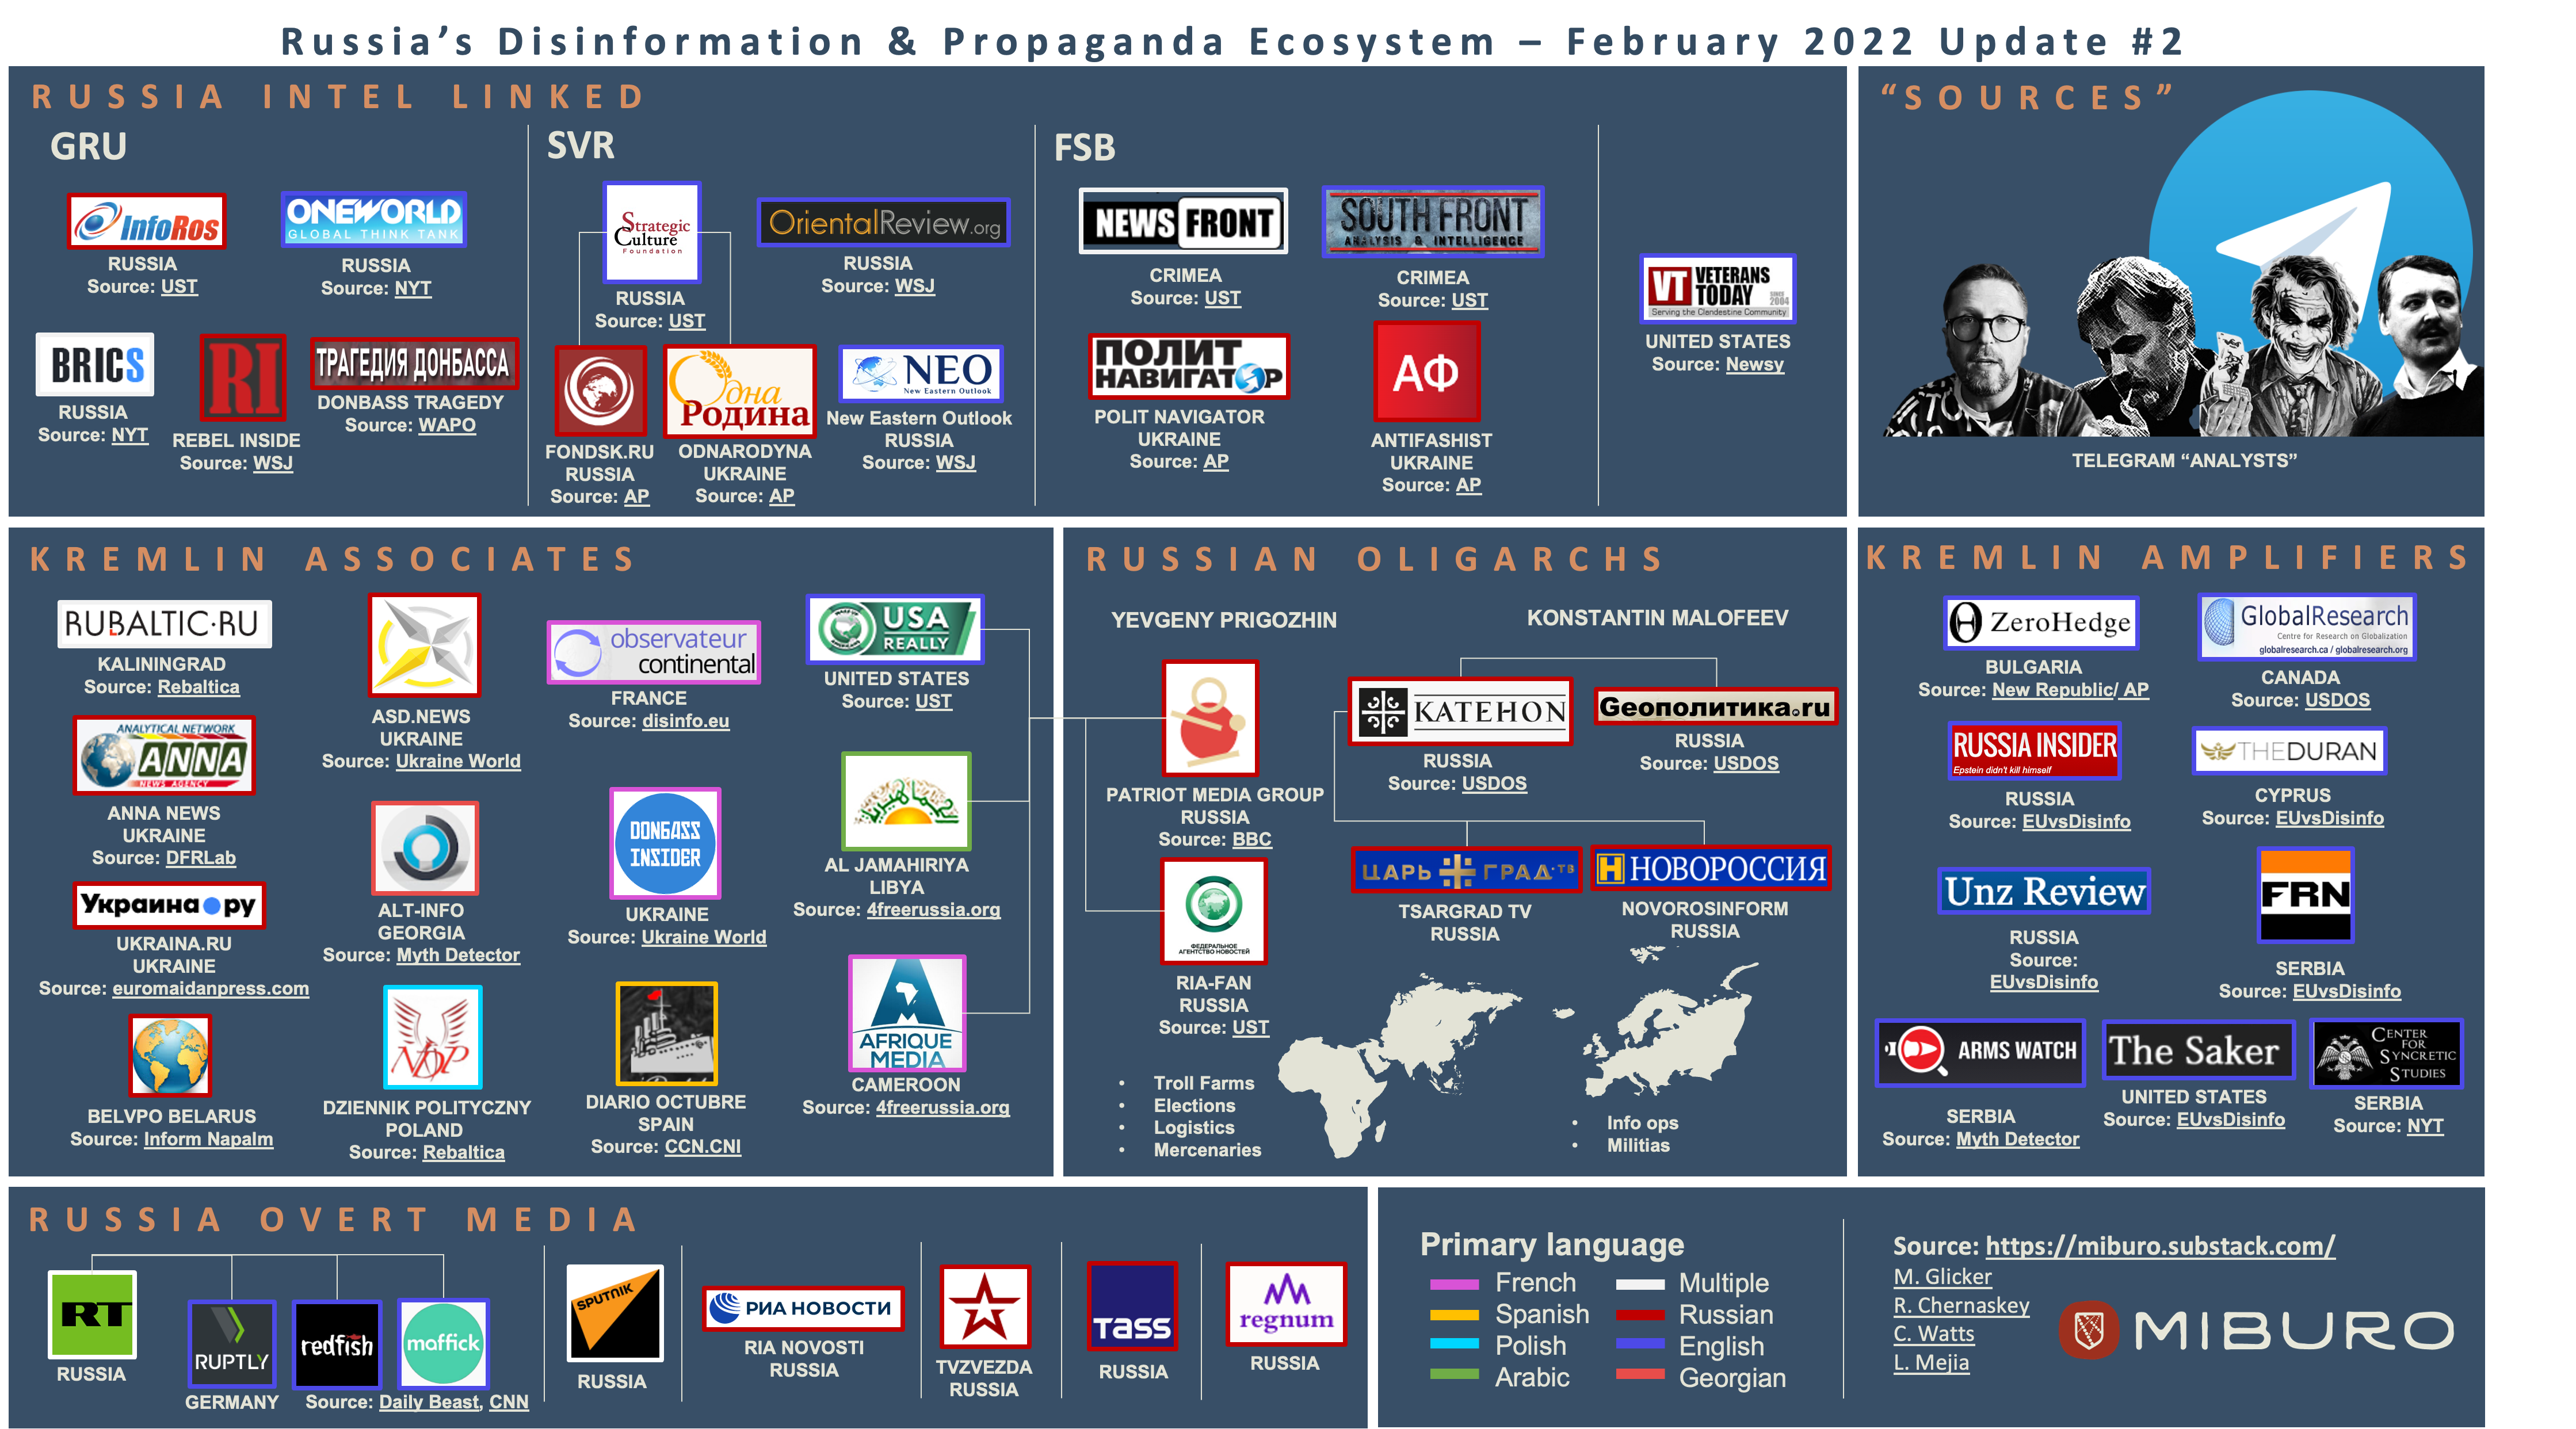



Source: https://miburo.substack.com/p/russias-propaganda-and-disinformation

Russian information operations are often commanded by Russian intelligence or security services, such as but not limited to:

1. GRU (Military Intelligence)
2. SVR (Foreign Intelligence)
3. FSB (Internal Security)

In dataset used in our analysis will feature tweets linked to GRU as well as the infamous Internet Research Agency (IRA). The IRA was known to host an elaborate information campaign targetting the US electorate in the 2016 US Elections.

---
# **Data Preparation**
---

We first download the following Russian datasets from IOA:

1. Russia_GRU_Feb_2021.csv
2. Russia_IRA_Feb_2021.csv
3. Russia_IRA_Oct_2018.csv
4. Russia_Jan_2019.csv
5. Russia_May_2020.csv


For each of these datasets, we will select only the English language tweets, an randomly sample only half of the entire dataset. We then concatenate all of the samples together into one dataset.

The resulting sampled RU dataset is very huge - close to 1 GB. We will perform the cleaning steps here, but we will export the cleaned dataset out as a csv, which we later will simply read for the modelling and evaluation sections

## Setups Configurations for Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# change the working directory
%cd '/content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main/'

/content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main


In [3]:
#Download the various dependencies not available in Google Colab. Use the magic function to suppress the output
%%capture
!pip install bertopic
!pip install demoji
!pip install --upgrade tensorflow-gpu==2.15

In [4]:
#'''
import os
cur_dir = os.getcwd()

#cur_dir = 'G://My Drive//Information Operations Archive EDA'

print(f'Current directory: {cur_dir}')

data_path      = cur_dir + '/1_Data/'
utilities_path = cur_dir + '/3_Notebooks/eda/'
plot_path      = cur_dir + '/3_Notebooks/eda/RU plots/'
#'''

Current directory: /content/drive/MyDrive/Data Science and Analytics Portfolio/2 Projects/2 Political Troll Tweets Analysis/2 Main


## Setup Configurations for Azure Machine Learning Studio


In [ ]:
'''
# Select kernel
# Open terminal - conda env list
# Select the environment you are using - conda activate XXX
# Then you can pip install the relavant librarires
'''

'\n# Select kernel\n# Open terminal - conda env list\n# Select the environment you are using - conda activate XXX\n# Then you can pip install the relavant librarires\n'

In [ ]:
'''
import os
cur_dir = os.getcwd()

print(f'Current directory: {cur_dir}')

data_path      = cur_dir[:-16] + '/1_Data/'
utilities_path = cur_dir[:-16] + '/3_Notebooks/eda/'
plot_path      = cur_dir[:-16] + '/3_Notebooks/eda/RU plots/'
'''

"\nimport os\ncur_dir = os.getcwd()\n\nprint(f'Current directory: {cur_dir}')\n\ndata_path      = cur_dir[:-16] + '/1_Data/'\nutilities_path = cur_dir[:-16] + '/3_Notebooks/eda/'\nplot_path      = cur_dir[:-16] + '/3_Notebooks/eda/RU plots/'\n"

In [5]:
# import modules and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpp
import re
import nltk
import demoji
import time
import sys
import tensorflow
import seaborn as sns
from datetime import datetime

#from bertopic import BERTopic

# import utilities module with all the function definitions
sys.path.insert(0, utilities_path)
from utilities import *

sns.set_style('whitegrid')
sns.set_theme(style='whitegrid',
              rc={'figure.dpi': 300, 'figure.figsize': (12, 6)},
              font_scale=0.65)


from wordcloud import WordCloud
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Read Dataset

We read the combined Russian ops dataset here.

After we have cleaned up and sampled the combined Russian dataset, we will just read the sample one, to prevent Colab from crashing

In [6]:
%%time
df        = pd.read_csv(data_path + 'RU_Sample.csv',  lineterminator = '\n', dtype = str).fillna('')
df_select = pd.read_csv(data_path + 'RU_Sample_Cleaned.csv', lineterminator = '\n', dtype = str).fillna('')

# Explicilty case the datatypes of the dataframes here
df = df.astype({'following_count' : int,
                'follower_count'  : int})

print(f"Length of sampled dataframe: {len(df)}\nLength of select dataframe for data visualization : {len(df_select)}")

df.head(2)

Length of sampled dataframe: 1048575
Length of select dataframe for data visualization : 1909282
CPU times: user 28.9 s, sys: 4.34 s, total: 33.2 s
Wall time: 39.6 s


tweetid  \
0   7.4063E+17   
1  5.44548E+17   

                                                             userid  \
0                                                        2980186012   
1  00bd49f19d4096b1f47e6e7702dddd746cf7021795f2349f42b64003dcb48638   

                                                  user_display_name  \
0                                                   Infidel II 🕋💣🕋💩   
1  00bd49f19d4096b1f47e6e7702dddd746cf7021795f2349f42b64003dcb48638   

                                                   user_screen_name  \
0                                                   CathyTo47590555   
1  00bd49f19d4096b1f47e6e7702dddd746cf7021795f2349f42b64003dcb48638   

           user_reported_location  \
0  USA  #IslamIsTheProbem #WakeUp   
1                   United States   

                                                                                                                                        user_profile_description  \
0  I believe that OUR COUNTRY needs to BAN ISLAM and #DeportALLMOSLEMS! Islam is pure evil! STANDUP, FIGHTBACK, SPEAKUP TAKE OUR COUNTRY BACK .. #INFIDELFORLIFE   
1                                                                                                                                                                  

  user_profile_url  follower_count  following_count account_creation_date  \
0                             8654             1446             15/1/2015   
1                               71               81             15/5/2014   

  account_language tweet_language  \
0               en             en   
1               en             en   

                                                                                                        tweet_text  \
0  RT @RealTrumpCard: @JoeFreedomLove @beneleo @DHecei The captain def wore it better..lol https://t.co/c8OIoEuF7h   
1                                                jelaous of girls who can wear their hair up and still look female   

         tweet_time   tweet_client_name in_reply_to_userid  \
0    8/6/2016 19:42  Twitter for iPhone                      
1  15/12/2014 17:41  Twitter Web Client                      

  in_reply_to_tweetid quoted_tweet_tweetid is_retweet retweet_userid  \
0                                                TRUE     3562290140   
1                                               FALSE                  

  retweet_tweetid latitude longitude quote_count reply_count like_count  \
0        7.41E+17   absent    absent           0           0          0   
1                   absent    absent           0           0          0   

  retweet_count hashtags urls  \
0             0       []   []   
1             0                 

                                     user_mentions poll_choices Unnamed: 0  \
0  [3562290140, 2735511486, 159122016, 3329715436]                           
1                                                                            

  Unnamed: 32 Unnamed: 33 Unnamed: 34 Unnamed: 35 Unnamed: 36 Unnamed: 37  \
0                                                                           
1                                                                           

  Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43  \r  
0                                                                          \r  
1                                                                          \r

In [7]:
df.dtypes

tweetid                     object
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count               int64
following_count              int64
account_creation_date       object
account_language            object
tweet_language              object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_userid          object
in_reply_to_tweetid         object
quoted_tweet_tweetid        object
is_retweet                  object
retweet_userid              object
retweet_tweetid             object
latitude                    object
longitude                   object
quote_count                 object
reply_count                 object
like_count                  object
retweet_count               object
hashtags                    object
urls                

We see that even the combined dataframe consist of close to 2 million tweets! We only pick the relevant columns for data viz. Denote this subdataframe as df_select.

In [8]:
'''
df_ru = df.copy()
df_select = df_ru[df_ru['tweet_language'] == 'en'][['tweet_text', 'hashtags']]
print(f"Length of dataframe for only English language tweets: {len(df_select)}")
#df_select = df_select.sample(n = 1000000, random_state = 93).reset_index(drop = True)
'''

'\ndf_ru = df.copy()\ndf_select = df_ru[df_ru[\'tweet_language\'] == \'en\'][[\'tweet_text\', \'hashtags\']]\nprint(f"Length of dataframe for only English language tweets: {len(df_select)}")\n#df_select = df_select.sample(n = 1000000, random_state = 93).reset_index(drop = True)\n'

## Data Cleaning

In the utilities module, we have defined a text cleaning function that we will use to clean up the tweet texts. It wil perform the following:

1. Remove emoji
2. Remove tags
3. Remove hashtags
4. Remove "amp"
5. Remove links

We apply the text processing function on the tweet texts

In [9]:
'''
%%time
df_select['clean_tweet_text'] = df_select['tweet_text'].apply(text_processing)
df_select.head(2)
'''

"\n%%time\ndf_select['clean_tweet_text'] = df_select['tweet_text'].apply(text_processing)\ndf_select.head(2)\n"

Save the dataframe above and load it later for data viz. We can restart the runtime and load the cleaned dataset to prevent Google Colab from using too much RAM and crashing.

In [10]:
'''
df_select.to_csv(data_path + 'RU_Sample_Cleaned.csv', index = False)
'''

"\ndf_select.to_csv(data_path + 'RU_Sample_Cleaned.csv', index = False)\n"

---
# **Modelling and Evaluation**
---

Here, we perform exploratory data analysis (EDA) on the tweet text.

First, we want to print the columns of the full dataframe to understand the schema of the dataset.

In [11]:
df_ru = df.copy()
for x in df_ru.columns:
    print(x)

tweetid
userid
user_display_name
user_screen_name
user_reported_location
user_profile_description
user_profile_url
follower_count
following_count
account_creation_date
account_language
tweet_language
tweet_text
tweet_time
tweet_client_name
in_reply_to_userid
in_reply_to_tweetid
quoted_tweet_tweetid
is_retweet
retweet_userid
retweet_tweetid
latitude
longitude
quote_count
reply_count
like_count
retweet_count
hashtags
urls
user_mentions
poll_choices
Unnamed: 0
Unnamed: 32
Unnamed: 33
Unnamed: 34
Unnamed: 35
Unnamed: 36
Unnamed: 37
Unnamed: 38
Unnamed: 39
Unnamed: 40
Unnamed: 41
Unnamed: 42
Unnamed: 43



In [12]:
df_ru.head(1)

tweetid      userid user_display_name user_screen_name  \
0  7.4063E+17  2980186012   Infidel II 🕋💣🕋💩  CathyTo47590555   

           user_reported_location  \
0  USA  #IslamIsTheProbem #WakeUp   

                                                                                                                                        user_profile_description  \
0  I believe that OUR COUNTRY needs to BAN ISLAM and #DeportALLMOSLEMS! Islam is pure evil! STANDUP, FIGHTBACK, SPEAKUP TAKE OUR COUNTRY BACK .. #INFIDELFORLIFE   

  user_profile_url  follower_count  following_count account_creation_date  \
0                             8654             1446             15/1/2015   

  account_language tweet_language  \
0               en             en   

                                                                                                        tweet_text  \
0  RT @RealTrumpCard: @JoeFreedomLove @beneleo @DHecei The captain def wore it better..lol https://t.co/c8OIoEuF7h   

       tweet_time   tweet_client_name in_reply_to_userid in_reply_to_tweetid  \
0  8/6/2016 19:42  Twitter for iPhone                                          

  quoted_tweet_tweetid is_retweet retweet_userid retweet_tweetid latitude  \
0                            TRUE     3562290140        7.41E+17   absent   

  longitude quote_count reply_count like_count retweet_count hashtags urls  \
0    absent           0           0          0             0       []   []   

                                     user_mentions poll_choices Unnamed: 0  \
0  [3562290140, 2735511486, 159122016, 3329715436]                           

  Unnamed: 32 Unnamed: 33 Unnamed: 34 Unnamed: 35 Unnamed: 36 Unnamed: 37  \
0                                                                           

  Unnamed: 38 Unnamed: 39 Unnamed: 40 Unnamed: 41 Unnamed: 42 Unnamed: 43  \r  
0                                                                          \r

## Earliest and Latest Recorded Tweets

What is the earliest recorded and latest recorded tweet time? From these dates, we can infer the period of operation for these trolls.

In [13]:
df_ru['tweet_time'] = pd.to_datetime(df_ru['tweet_time'], format='mixed')

min_time = df_ru['tweet_time'].min()
max_time = df_ru['tweet_time'].max()

print(f'Earliest recorded Tweet time: {min_time}\nLatest recorded Tweet time: {max_time}')

Earliest recorded Tweet time: 2009-03-12 08:00:00
Latest recorded Tweet time: 2020-12-27 14:18:00


## Earliest and Latest Account Creation Times

In [14]:
df_ru['account_creation_date'] = pd.to_datetime(df_ru['account_creation_date'], format='mixed')

min_time = df_ru['account_creation_date'].min()
max_time = df_ru['account_creation_date'].max()

print(f'Earliest account created on: {min_time}\nLatest account created on: {max_time}')

Earliest account created on: 2009-01-09 00:00:00
Latest account created on: 2020-12-07 00:00:00


From these values, we can tell that the earliest troll account was created in 2009, and operations persist until late 2020.

## Exploring User Display Names

The user display names used by the operatives is something interesting to study. It gives us an idea to what kind of 'character' the operative is trying to portray or impersonate. We also note that a large fraction of the user display names is hashed. This could be because the account was created in the United States, and hence a need to anonymize the account names. We will make a copy of the df, and select only account that is English, and the user display names is less than 20 characters.

In [15]:
df_copy   = df_ru.copy()
df_ru_acc = df_copy[(df_copy['user_display_name'].str.len() < 20) &
                    (df_copy['account_language'] == 'en')].copy()

unique_user_display_names = df_ru_acc['user_display_name'].unique()
unique_user_display_names

array(['Infidel II 🕋💣🕋💩', 'New York City Today', 'Bleep The Police',
       'Giselle Evans', 'Rick Irwin', 'World Of Hashtags',
       'New Orleans Online', 'San Jose Daily', 'Seattle Post',
       'San Diego Daily', 'Chicago Daily News', 'St. Louis Online',
       'Oakland Online', 'San Francisco Daily', 'Screamy Monkey',
       'Dominic Valentine', 'Room Of Rumor', 'Detroit Daily News',
       'Warfare Worldwide', 'Traynesha Cole 🌐', 'Jenna Abrams',
       'SamTheInfidel👩\u200d💻', 'Pigeon Today', 'Phoenix Daily News',
       'Memphis Online', 'Casey Pittman', 'Resistance Girl ✊🏿',
       'Los Angeles Daily', 'Politweecs', 'Baltimore Online',
       '1-800-WOKE-AF', 'Philadelphia Online', 'Christian Morgan',
       'Boston Today', 'Tennessee', 'Black News', 'Washington Online',
       'Messiah Haynes', 'Cleveland Online', 'KansasCityDailyNews',
       'Dana Gold', 'Miami Today', 'Heart Of Texas', 'Atlanta Online',
       'Syria Today', 'Gunslinger Girl', 'Jemisha', 'Black To Live',
  

We can just pick one of them, and look at what kinds of tweets

In [16]:
df_ru_acc[df_ru_acc['user_display_name'] == 'Infidel II 🕋💣🕋💩'][['tweet_text']]

tweet_text
0                                       RT @RealTrumpCard: @JoeFreedomLove @beneleo @DHecei The captain def wore it better..lol https://t.co/c8OIoEuF7h
2                         RT @PDN_Spring: I would be in jail! I would be tearing that building down if they cheated on my vote! https://t.co/48Juo1O7SO
31                RT @Jay_Smith_94: ISIS wants to kill or convert. Recognition is minuscule in their goal to conquer the west.  https://t.co/HKPlei7UUA
44         RT @AndrewLuck23: Obama Calls Jason Collins After NBA Player Comes Out (but not Steinle family) http://t.co/PTGv6S3F4B @megynkelly @WakeUpA…
51                    RT @dhrxsol1234: Articles: A Retired FBI Agent Addresses James Comey on the Hillary Clinton Investigation https://t.co/dhJim9OjVb
...                                                                                                                                                 ...
1048490                                     RT @TrumpVolume: Lets make the Clintons #BrokeAgain ~  Join https://t.co/Mj7KqKE0ac https://t.co/s3KZIN71ne
1048523                                  RT @creepingsharia: Illegals smuggled from jihadi hot spots thru Latin America to U.S. https://t.co/VZE4j4x5FL
1048550                                 RT @FiveRights: #IranTalks Remember that just hours ago, FRANCE walked out on this deal. http://t.co/pTzQffiGDD
1048551  RT @Don_Vito_08: #CrookedHillary is Unfit to Hold Office in the USA #VoteTrump2016\n#Benghazi #ClintonFoundation \n#NeverHillary https://t.co…
1048557    RT @CiteShare: "#Beyoncé, Prompted by Shootings, Finds a More Forceful Voice," aligning herself more with #blacklivesmatter https://t.co/hX…

[67575 rows x 1 columns]

## Exploring User Reported Locations

Operatives usually mask the true location of the tweets - for example, they would spoof the location to somehwere in USA and not give away the real location of the account. Can we see this in the data?


In [17]:
df_ru_acc['user_reported_location'] = df_ru_acc['user_reported_location'].replace({'' : 'NULL'})

df_location_pvt = df_ru_acc.pivot_table(values  = ['userid'],
                                        index   = ['user_reported_location'],
                                        aggfunc = 'count').reset_index()

df_location_pvt.rename({'userid' : 'Number of Users'}, axis = 1, inplace = True)
df_location_pvt.sort_values(by = ['Number of Users'], ascending = False, inplace = True)

df_location_pvt

user_reported_location  Number of Users
52  USA  #IslamIsTheProbem #WakeUp            67575
28                            NULL            45552
53                   United States            30696
51                             USA            26037
31                    New York, NY            16252
7                      Chicago, IL            14490
19                 Kansas City, MO            14143
30                 New Orleans, LA            12597
43               San Francisco, CA            12315
37                  Pittsburgh, PA             9019
55                Washington, D.C.             8915
44                     Seattle, WA             8187
9           City of Cleveland, USA             7530
46                         StLouis             7087
10        City of Phoenix, Arizona             7048
13               Detroit, Michigan             6924
45                    St Louis, MO             6343
38                  Pittsburgh, US             6160
42                   San Diego, CA             6100
49                      Texas, USA             5980
16                     Houston, TX             5832
12                   Dallas, Texas             5666
36                Philadelphia, PA             5525
22                 Los Angeles, CA             5133
8                   Cincinnati, OH             4738
3                    Baltimore, MD             4649
34                     Oakland, CA             3963
25                 Minneapolis, MN             3874
5                      Boston, USA             3697
2                      Atlanta, GA             3637
17  I AM A CITIZEN OF THE UNIVERSE             3425
23                     Memphis, TN             3413
1                          Atlanta             3256
6                          Chicago             2493
29                      New - York             2133
24                       Miami, FL             2122
39                    Richmond, VA             2117
27                  Moscow, Russia             2114
50                              US             1377
35                     Oslo, Norge             1188
21                 London, England             1178
56                  Wisconsin, USA             1076
47                           Syria             1034
14                  El Paso, Texas              972
32                   New York, USA              820
4                    Black America              703
26                     Mohnton, PA              596
20                   Lafayette, LA              433
15                       Flint, MI              324
18       Islamic States of America              291
0                   All Over Texas              282
48                  Tennessee, USA               30
57                          Москва               29
41        Saint Petersburg, Russia                7
54                        Universe                3
11                  Crimea, Russia                3
40          Rostov-na-Donu, Russia                1
33        Nizhniy Novgorod, Russia                1
58         Санкт-Петербург, Россия                1

Indeed, there is no surprise that the majority of the location in which the tweets originate comes from the USA

## Proportion of Retweets

An operative may choose instead to parrot or amplify what other users - troll or not - have said. How many proportions of the tweets are retweets and others are not?

In [18]:
df_retweets = df_ru_acc['is_retweet'].value_counts().to_frame()
df_retweets

count
is_retweet        
FALSE       277783
TRUE        119303

## Operative Account Statistics

We can also calculate basic statistics of an account. Such as the mean number of followers, those accounts with the largest number of followers etc.

In [19]:
df_acc_stats = df_ru_acc[['userid', 'user_display_name', 'follower_count', 'following_count']].copy()
df_acc_stats.drop_duplicates(inplace = True)
df_acc_stats.head()

userid    user_display_name  follower_count  following_count
0   2980186012      Infidel II 🕋💣🕋💩            8654             1446
12  2752677905  New York City Today           66980            10500
13  1687183549     Bleep The Police           21098             8599
16  2882013788        Giselle Evans           28107            13442
17  2598367019           Rick Irwin            5986             4850

By sorting the dataframe on the two columns, we can see which operative has the most number of followers:

In [20]:
df_acc_stats.sort_values(['follower_count'], ascending = False, inplace = True)
df_acc_stats.head()

userid   user_display_name  follower_count  following_count
877992  2527472164      Вестник Москвы          257638              544
426893   182527121           Хайполог™          190347              302
216279   508761973  Вестник Петербурга          149672             1024
169     4224729994           Tennessee          147767            74664
414811  2648734430       Вестник Крыма          106462              386

And the most number of following:

In [21]:
df_acc_stats.sort_values(['following_count'], ascending = False, inplace = True)
df_acc_stats.head()

userid user_display_name  follower_count  following_count
169    4224729994         Tennessee          147767            74664
1619  8.42369E+17      Luisa Haynes           57295            50746
980    4355797094   Texas Lone Star           53999            49272
352    4332740714   Gunslinger Girl           44895            45382
981    4272870988      Pamela Moore           72121            42080

We can also see which account tweeted the most number of times

In [22]:
df_acc_feq = df_ru_acc.groupby(['user_display_name'])['tweet_text'].count().sort_values(ascending = False)
df_acc_feq[:10]

user_display_name
Infidel II 🕋💣🕋💩        67575
SamTheInfidel👩‍💻       16751
New York City Today    16252
Chicago Daily News     14490
KansasCityDailyNews    14143
New Orleans Online     12597
Screamy Monkey         12492
San Francisco Daily    12315
Pittsburgh Today        9019
Washington Online       8915
Name: tweet_text, dtype: int64

## Activity Time Series Analysis

Besides the metadata, by looking at the number of tweets tweeted out against time, allow us to understand during which period over the course of their operation, when is their most busy. Typically, such spike in activity by the operatives is in response to some international event in which they are trying to sway or influence

In [23]:
df_acc_time   = df_ru_acc.copy()
df_acc_hist   = df_acc_time.groupby(['account_creation_date'])['tweet_text'].count().to_frame().reset_index()

# Cast the date to datetime
df_acc_hist['account_creation_date'] = pd.to_datetime(df_acc_hist['account_creation_date'], format='%Y-%m-%d')

# Extract the year from the datetimes
df_acc_hist['Year'] = df_acc_hist['account_creation_date'].dt.year

# Sort by the dates
df_acc_hist.sort_values(by = ['account_creation_date'], ascending = True, inplace = True)

In [24]:
df_acc_hist.head(10)

account_creation_date  tweet_text  Year
0            2009-02-07        2114  2009
1            2010-08-24           1  2010
2            2011-09-19          26  2011
3            2012-02-29           7  2012
4            2013-01-09        2493  2013
5            2013-06-08        1963  2013
6            2013-08-21        3719  2013
7            2013-12-21          28  2013
8            2014-02-06        4738  2014
9            2014-03-05           9  2014

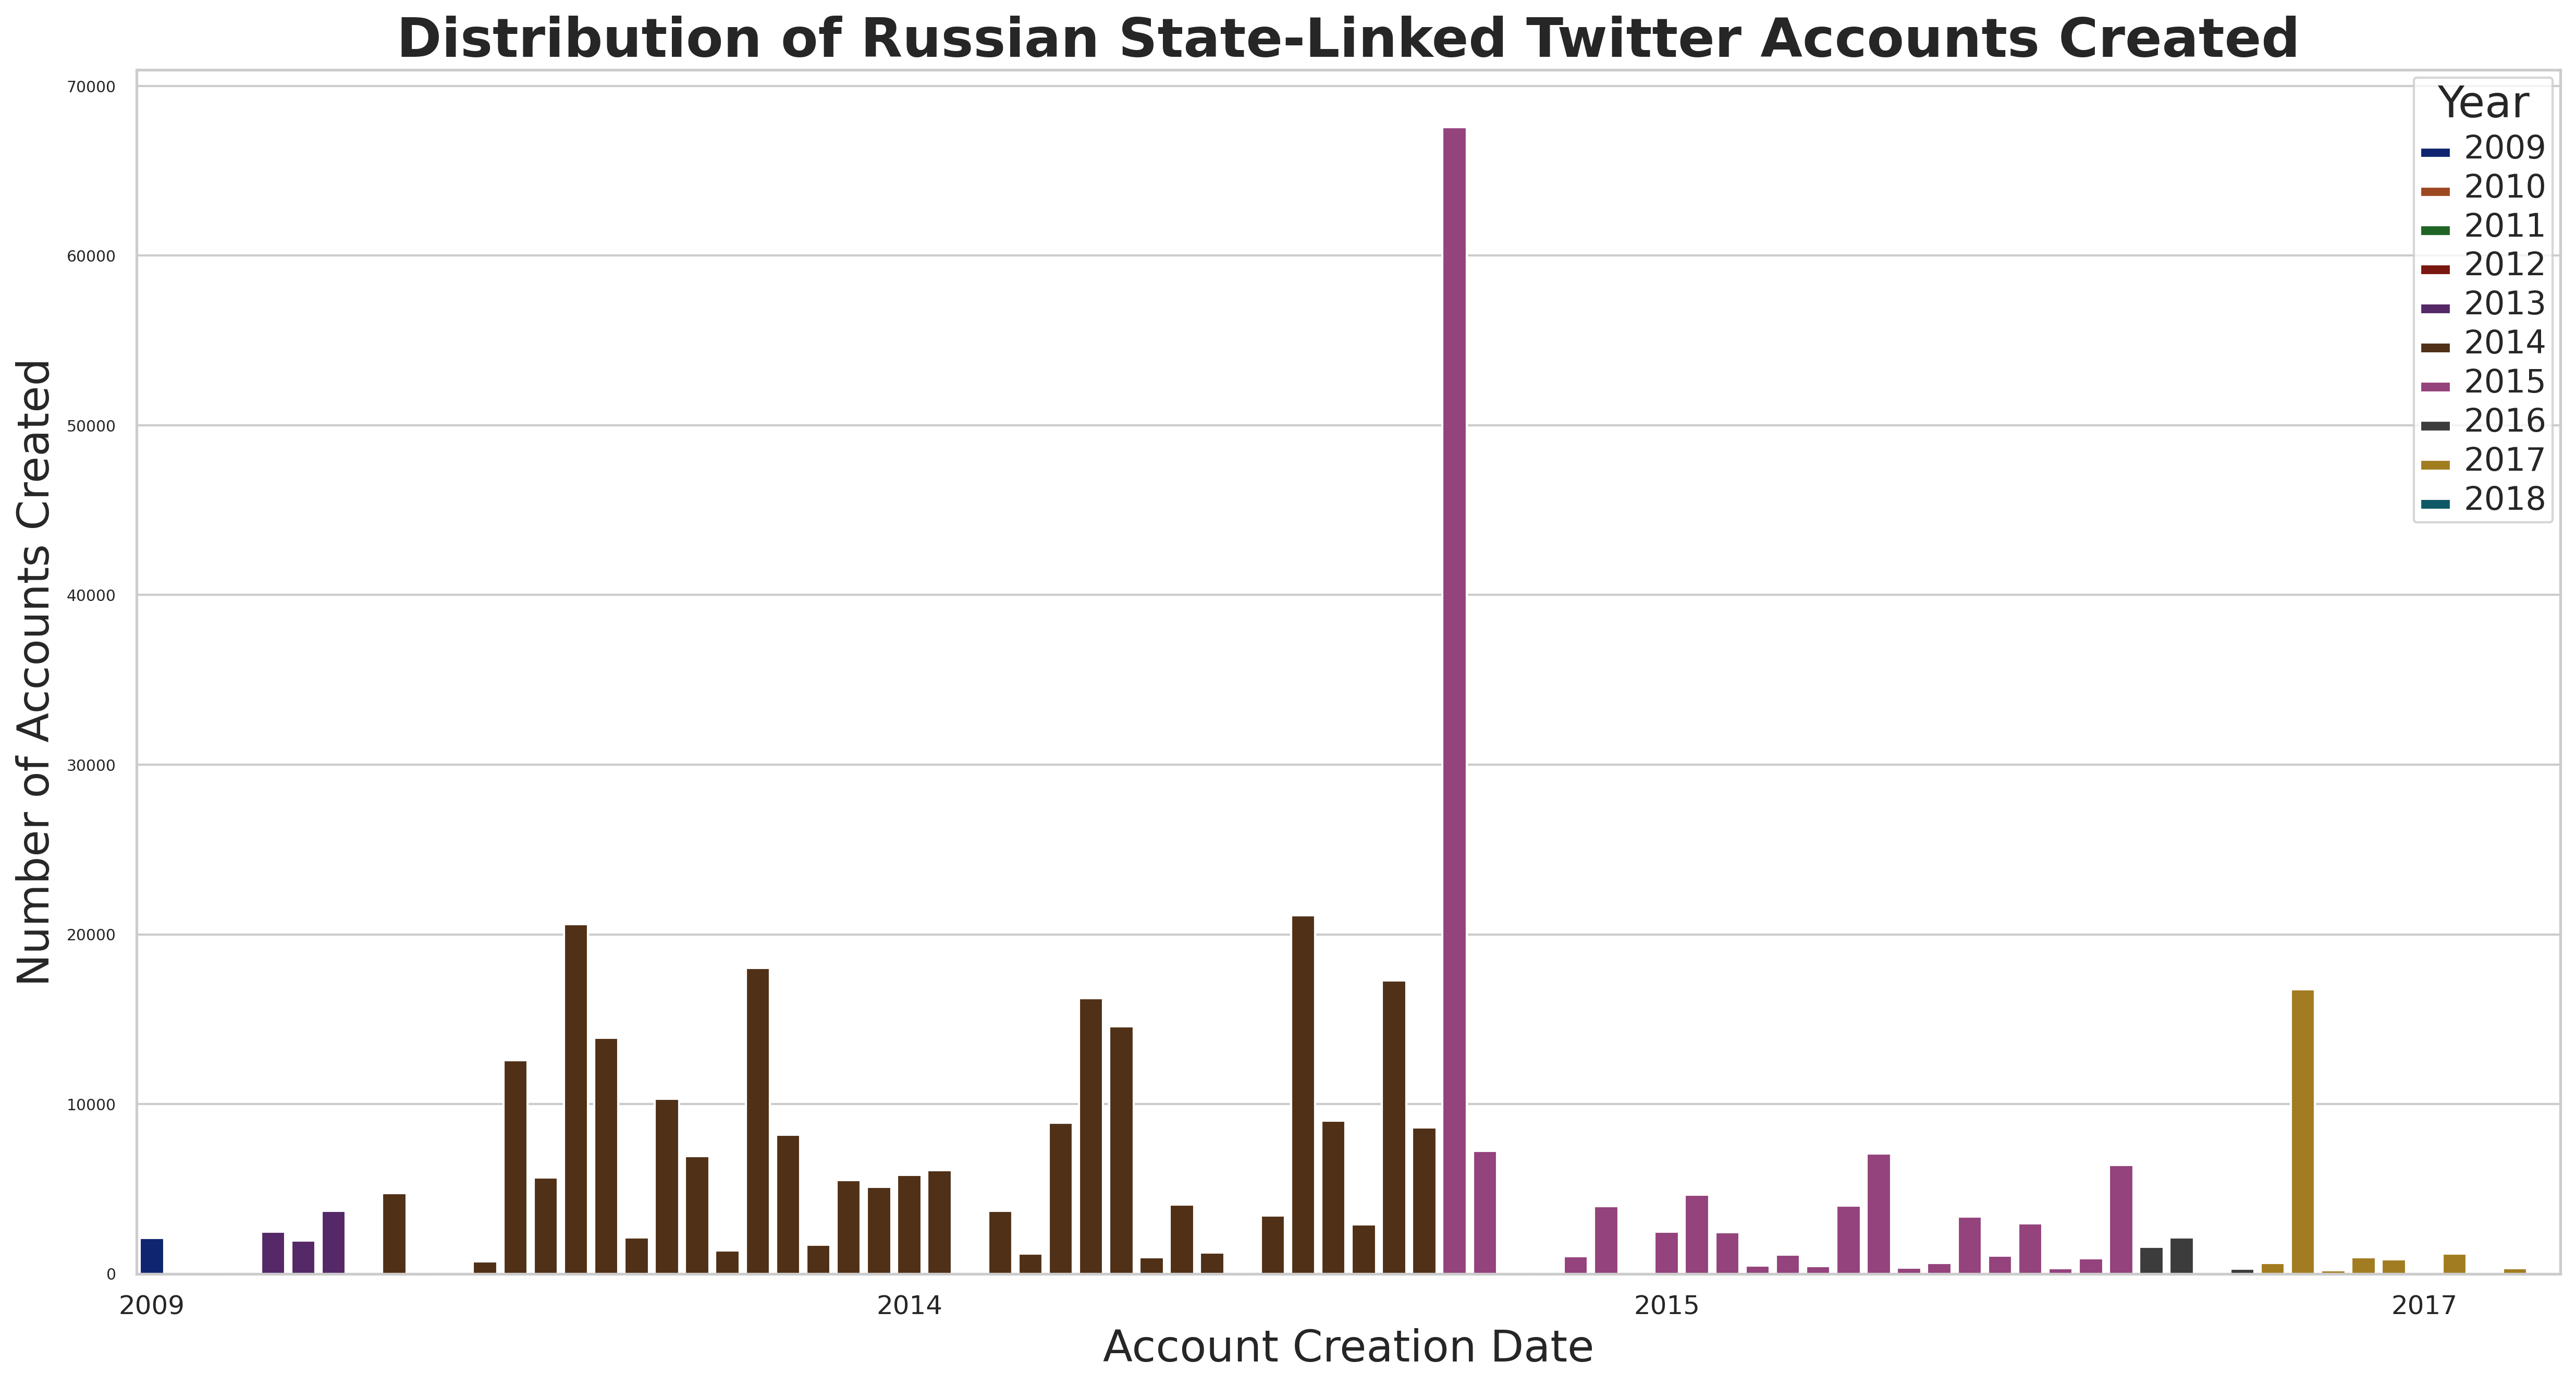

In [25]:
mpp.figure(1, (20, 10), dpi = 300)

# Get the current axis
ax = mpp.gca()

# Save a palette to a variable
palette = sns.color_palette('dark', n_colors = 10)
barplot = sns.barplot(df_acc_hist, x = 'account_creation_date', y = 'tweet_text', hue = 'Year', palette = palette)

mpp.title('Distribution of Russian State-Linked Twitter Accounts Created', fontsize = 25, weight = 'bold')
mpp.ylabel('Number of Accounts Created', fontsize = 20); mpp.xlabel('Account Creation Date', fontsize = 20)

# Set the x labels
interval = 25
df_temp = df_acc_hist.loc[::interval]
ticks_to_use = df_temp.index
labels = df_temp['Year'].values

ax.set_xticks(ticks_to_use)
ax.set_xticklabels(labels)
mpp.xticks(fontsize = 12)

# Legend settings
mpp.setp(barplot.get_legend().get_title(), fontsize = 20)
mpp.setp(barplot.get_legend().get_texts(), fontsize = 15)

mpp.savefig(plot_path + 'RU_account_dis.png', dpi = 300)
mpp.show()

In [26]:
df_acc_time['tweet_time'] = pd.to_datetime(df_acc_time['tweet_time'], format='%Y-%m-%d')
df_acc_time['Year-Month'] = pd.to_datetime(df_acc_time['tweet_time']).dt.strftime('%Y-%m')
df_acc_time['Year'] = df_acc_time['tweet_time'].dt.year

# Groupby and count the number of tweets generated in that month in that year
df_tweet_hist = df_acc_time.groupby(['Year-Month', 'Year'])['tweet_text'].count().to_frame().reset_index()

# Sort by the most number of tweets generated in that month in that year
df_tweet_hist_max = df_tweet_hist.sort_values(by = ['tweet_text'], ascending = False)

# Select the top 100 most busiest year-month
df_tweet_hist_max = df_tweet_hist_max.iloc[:200]

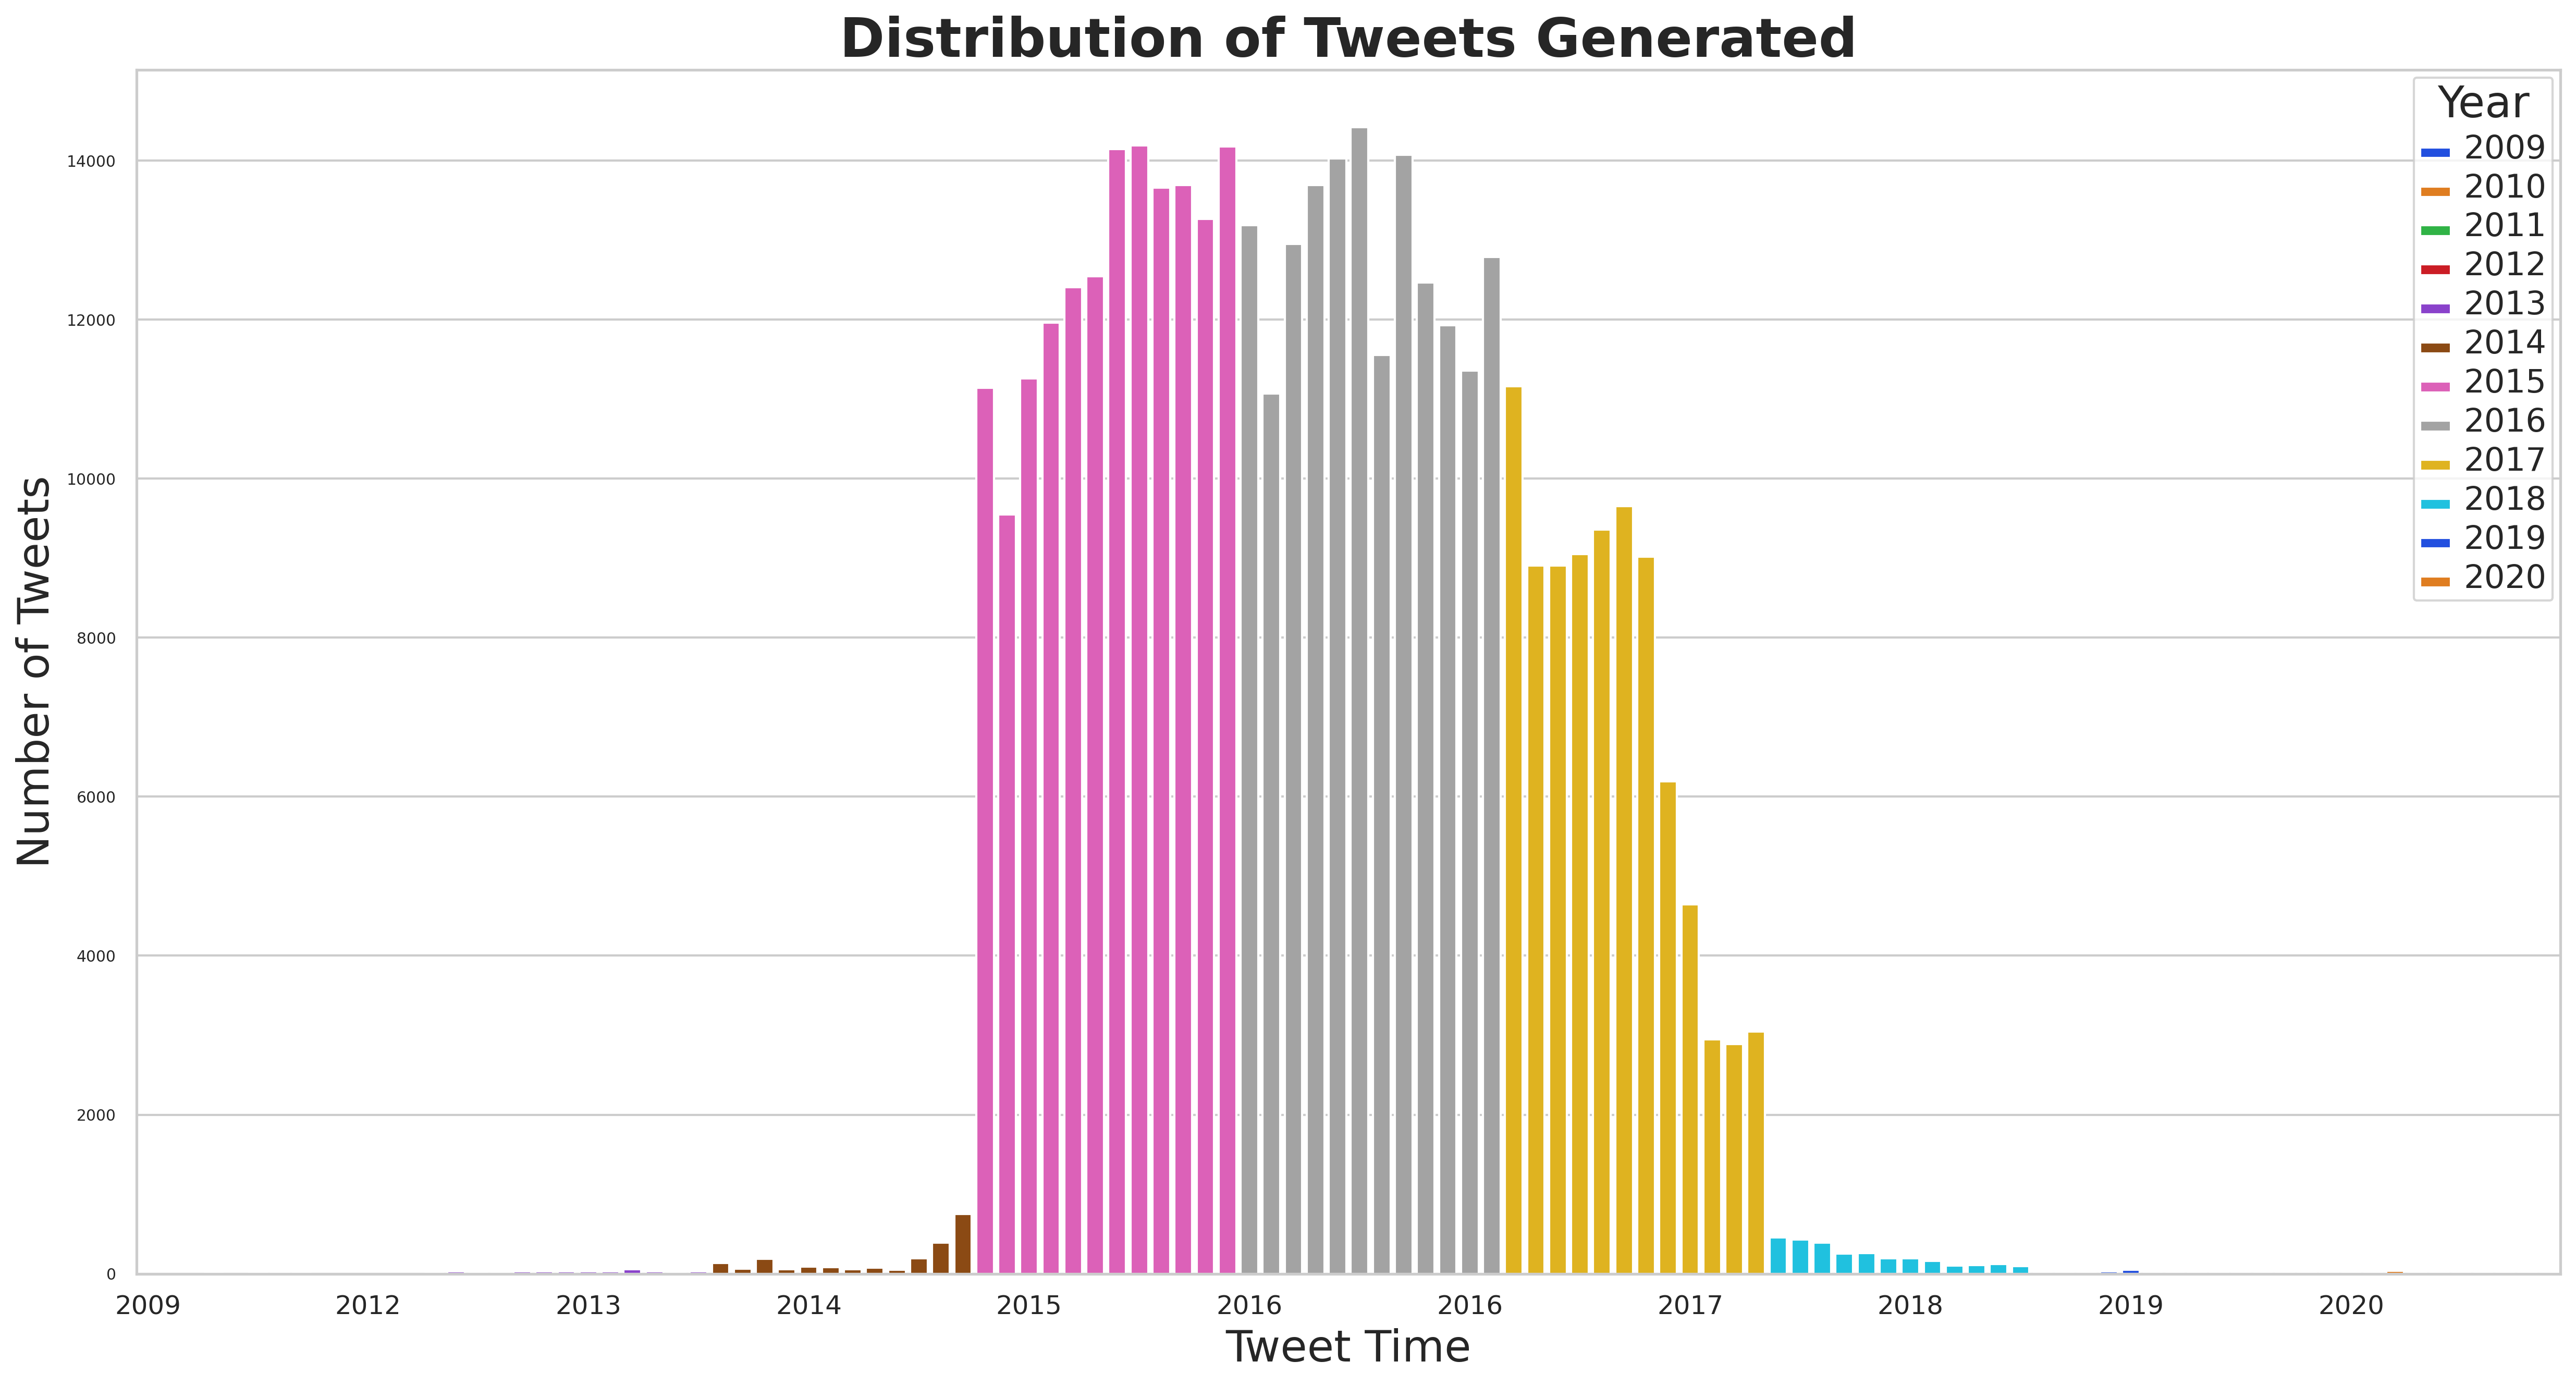

In [27]:
mpp.figure(1, (20, 10), dpi = 300)

# Get the current axis
ax = mpp.gca()

# Save a palette to a variable
palette = sns.color_palette('bright', n_colors = 12)
barplot = sns.barplot(df_tweet_hist, x = 'Year-Month', y = 'tweet_text', hue = 'Year', palette = palette)

mpp.title('Distribution of Tweets Generated', fontsize = 25, weight = 'bold')
mpp.ylabel('Number of Tweets', fontsize = 20); mpp.xlabel('Tweet Time', fontsize = 20)

# Set the x labels
interval = 10
df_temp = df_tweet_hist.loc[::interval]
ticks_to_use = df_temp.index
labels = df_temp['Year'].values

ax.set_xticks(ticks_to_use)
ax.set_xticklabels(labels)
mpp.xticks(fontsize = 12)

# Legend settings
mpp.setp(barplot.get_legend().get_title(), fontsize = 20)
mpp.setp(barplot.get_legend().get_texts(), fontsize = 15)

mpp.savefig(plot_path + 'RU_tweet_dis.png', dpi = 300)
mpp.show()

Indeed, we see two spikes in the activity in years 2015.

## Hashtags Analysis

We want to figure out what kinds of hashtags are been used? We can put all of the hashtags in a giant list, and generate a word cloud through their tfidf scores.

But before this can be done, we need to clean up the hashtags column abit more. Because the column is of dtype object - that means we have strings of lists. We need to convert these strings of lists into list of lists. We then append all of the elements in each list into a large list of hashtags

In [28]:
df_hashtags = df_select
df_hashtags = df_hashtags[df_hashtags['hashtags'].str.len() > 2].reset_index(drop = True)
hashtag_col_vals = df_hashtags['hashtags'].values
hashtag_col_vals

array(['[WeDemandJustice, BlackLivesMatter]', '[IGetDepressedWhen]',
       '[ToDoListBeforeChristmas]', ..., '[ThingsEveryBoyWantsToHear]',
       '[showbiz]', '[ThinkBIGSundayWithMarsha]'], dtype=object)

In [29]:
hashtag_lists = [re.findall(r'[A-Za-z0-9]+', lst) for lst in hashtag_col_vals]

hashtags = [y for x in hashtag_lists for y in x]
print(f"Length of all hashtags : {len(hashtags)}")

Length of all hashtags : 1419206


Now we can plot the wordcloud. We will restrict to the first 3000 hashtags to prevent Python from crashing

If there are errors in plotting the wordcloud, then have to switch to an appropriate version of Pillow

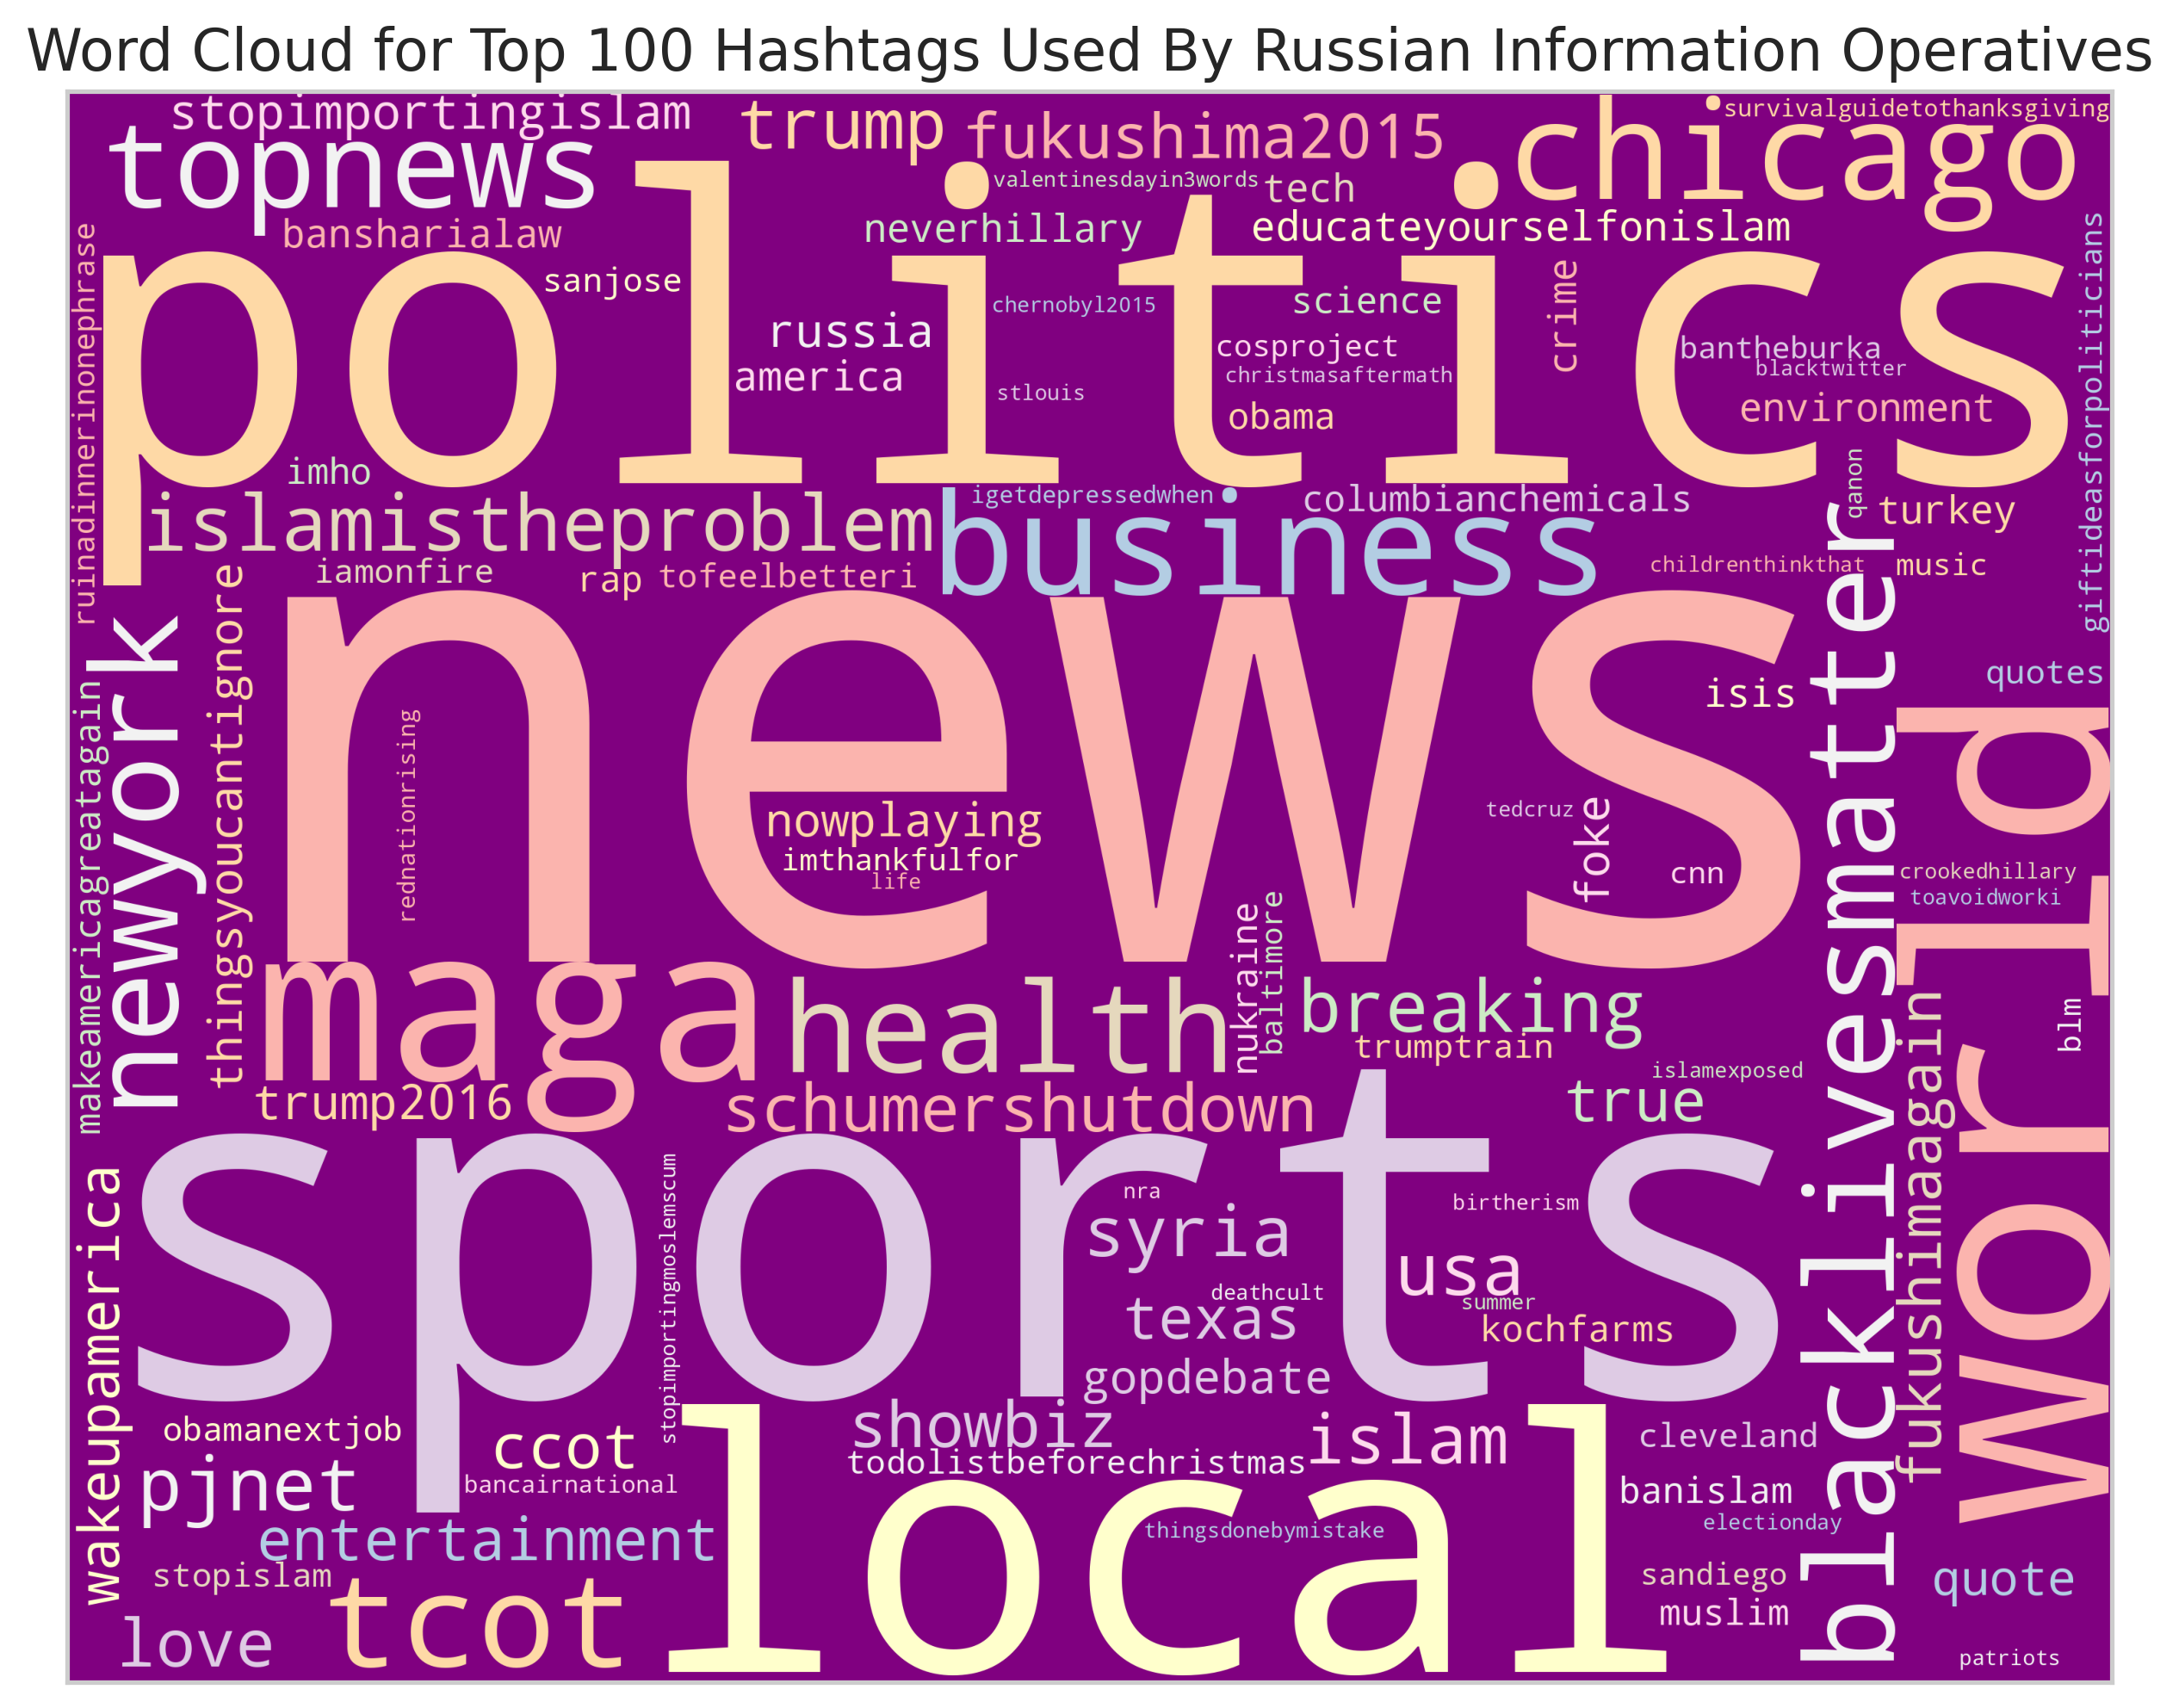

In [30]:
hashtags_word_feq = word_freq_tfidf(hashtags[:3000])

plot_wordcloud(hashtags_word_feq, 'purple', 'Pastel1', 100,
               'Word Cloud for Top 100 Hashtags Used By Russian Information Operatives',
               3, 18, 8, plot_path + 'RU_hashtags_wordcloud.png')

## Profile Description Analysis

We use can create a wordcloud to exploit the profile description of the trolls. However, the text cleaning is slightly tricky, as we should not remove links and tags. So, we should aim to remove the special characters instead, and lowercase all the words.

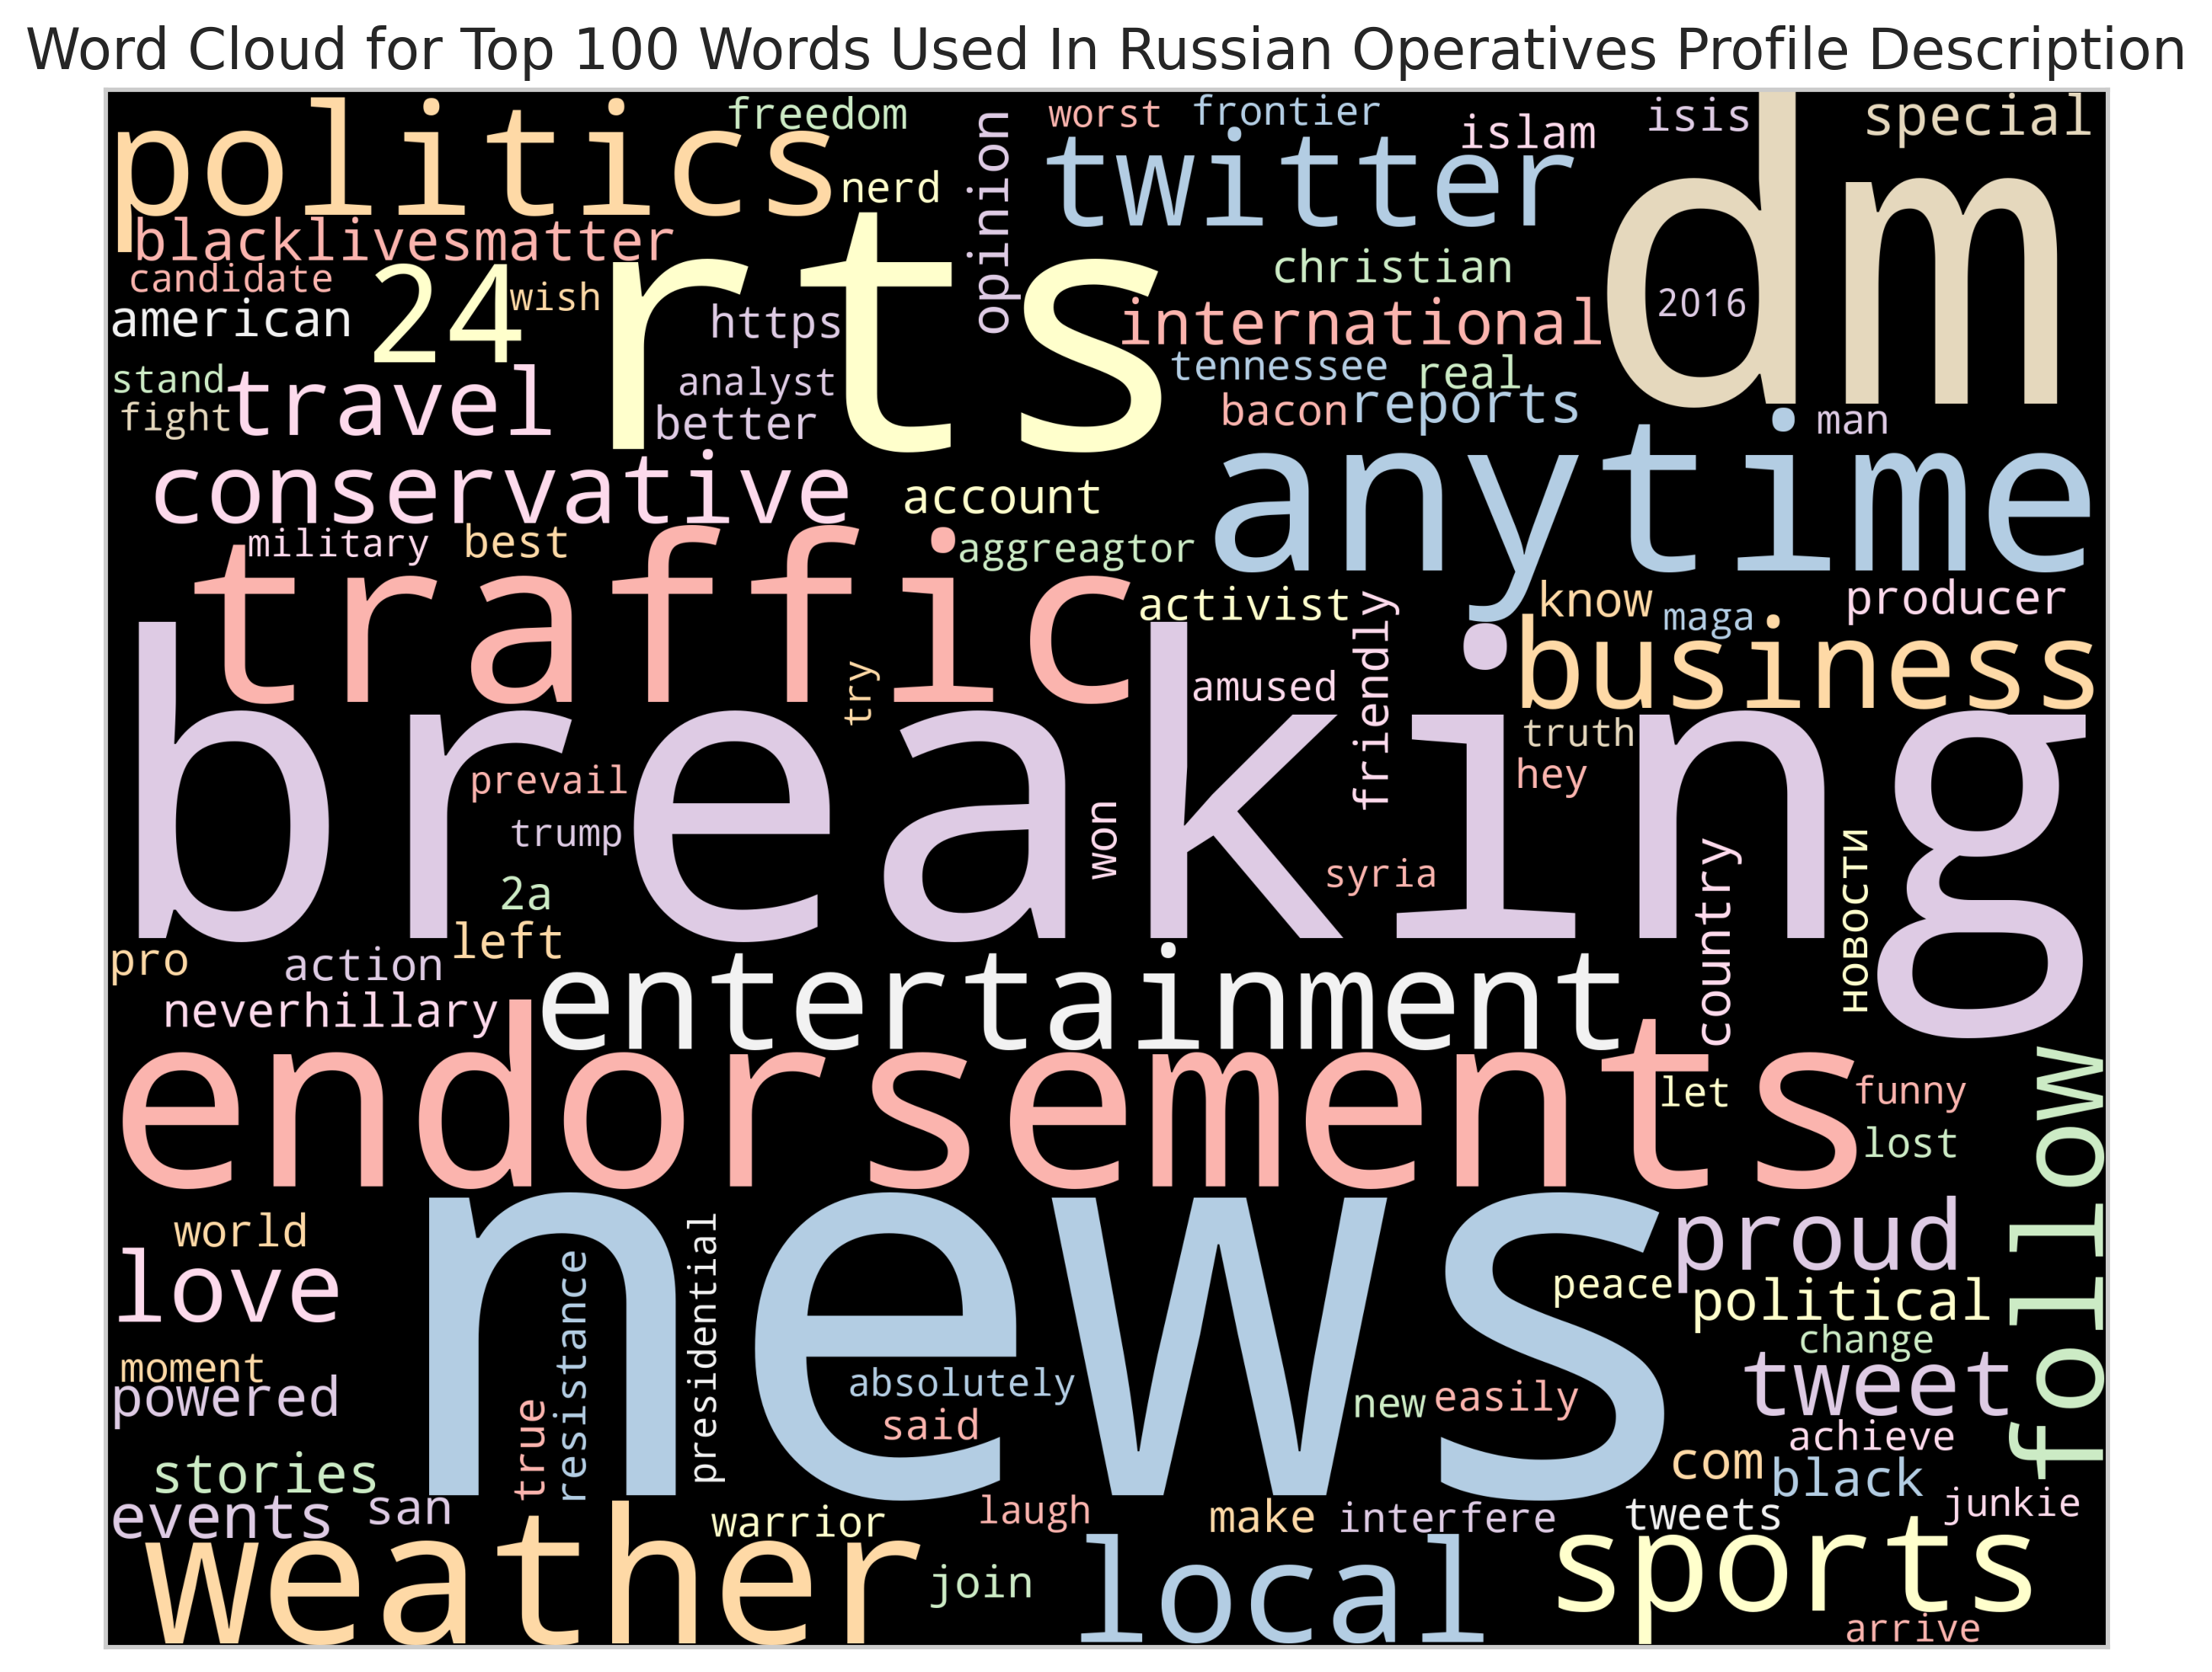

In [32]:
df_copy = df_ru_acc.copy()
df_copy = df_copy.drop_duplicates(subset = ['user_display_name'])
df_copy = df_copy[df_copy['user_profile_description'].str.len() != 0].copy()
df_copy['clean_description'] = df_copy['user_profile_description'].apply(lambda x : re.sub(r'#', '', x))
df_copy['clean_description'] = df_copy['clean_description'].apply(lambda x : re.sub(r'@', '', x).lower())

clean_description = df_copy['clean_description'].values

desc_feq = word_freq_tfidf(clean_description[:3000])

plot_wordcloud(desc_feq, 'black', 'Pastel1', 100,
               'Word Cloud for Top 100 Words Used In Russian Operatives Profile Description',
               3, 18, 8, plot_path + 'RU_profile_wordcloud.png')

## Topics Evolution Analysis

This is something interesting to explore. We can ask ourselves: "How has Russian tradecraft changed from 2010 to 2020?" What different kinds of topics are the operatives targetting? We can groupby the tweets by on their tweet times into different years. We then plot individual word clouds for each of the years. This way, we can se the change in the topics and themes over the years. We would also need to clean the tweet text as well

We are only interested in English language tweets and we break up the English tweets into periods of 3 years

In [ ]:
%%time
df_copy = df_ru_acc.copy()
df_copy = df_copy[df_copy['tweet_language'] == 'en']
df_copy = df_copy[['tweet_time', 'tweet_text']].copy()

df_copy['tweet_year']       = df_copy['tweet_time'].dt.year
df_copy['clean_tweet_text'] = df_copy['tweet_text'].apply(text_processing)

df_copy.head(2)

CPU times: user 5min 36s, sys: 1.65 s, total: 5min 38s
Wall time: 5min 43s


tweet_time  \
0 2016-08-06 19:42:00   
2 2016-06-04 01:48:00   

                                                                                                                      tweet_text  \
0                RT @RealTrumpCard: @JoeFreedomLove @beneleo @DHecei The captain def wore it better..lol https://t.co/c8OIoEuF7h   
2  RT @PDN_Spring: I would be in jail! I would be tearing that building down if they cheated on my vote! https://t.co/48Juo1O7SO   

   tweet_year  \
0        2016   
2        2016   

                                                                        clean_tweet_text  
0                                                    the captain def wore it better..lol  
2  i would be in jail! i would be tearing that building down if they cheated on my vote!

We split up the dataframe into periods of 3 years

In [ ]:
df_2009_to_2011 = df_copy[df_copy['tweet_year'].isin([2009, 2010, 2011])]
df_2012_to_2014 = df_copy[df_copy['tweet_year'].isin([2012, 2013, 2014])]
df_2015_to_2017 = df_copy[df_copy['tweet_year'].isin([2015, 2016, 2017])]
df_2018_to_2020 = df_copy[df_copy['tweet_year'].isin([2018, 2019, 2020])]

df_periods = [df_2009_to_2011, df_2012_to_2014, df_2015_to_2017, df_2018_to_2020]

Select the cleaned tweet text from each of the dataframes above and generate the word cloud!

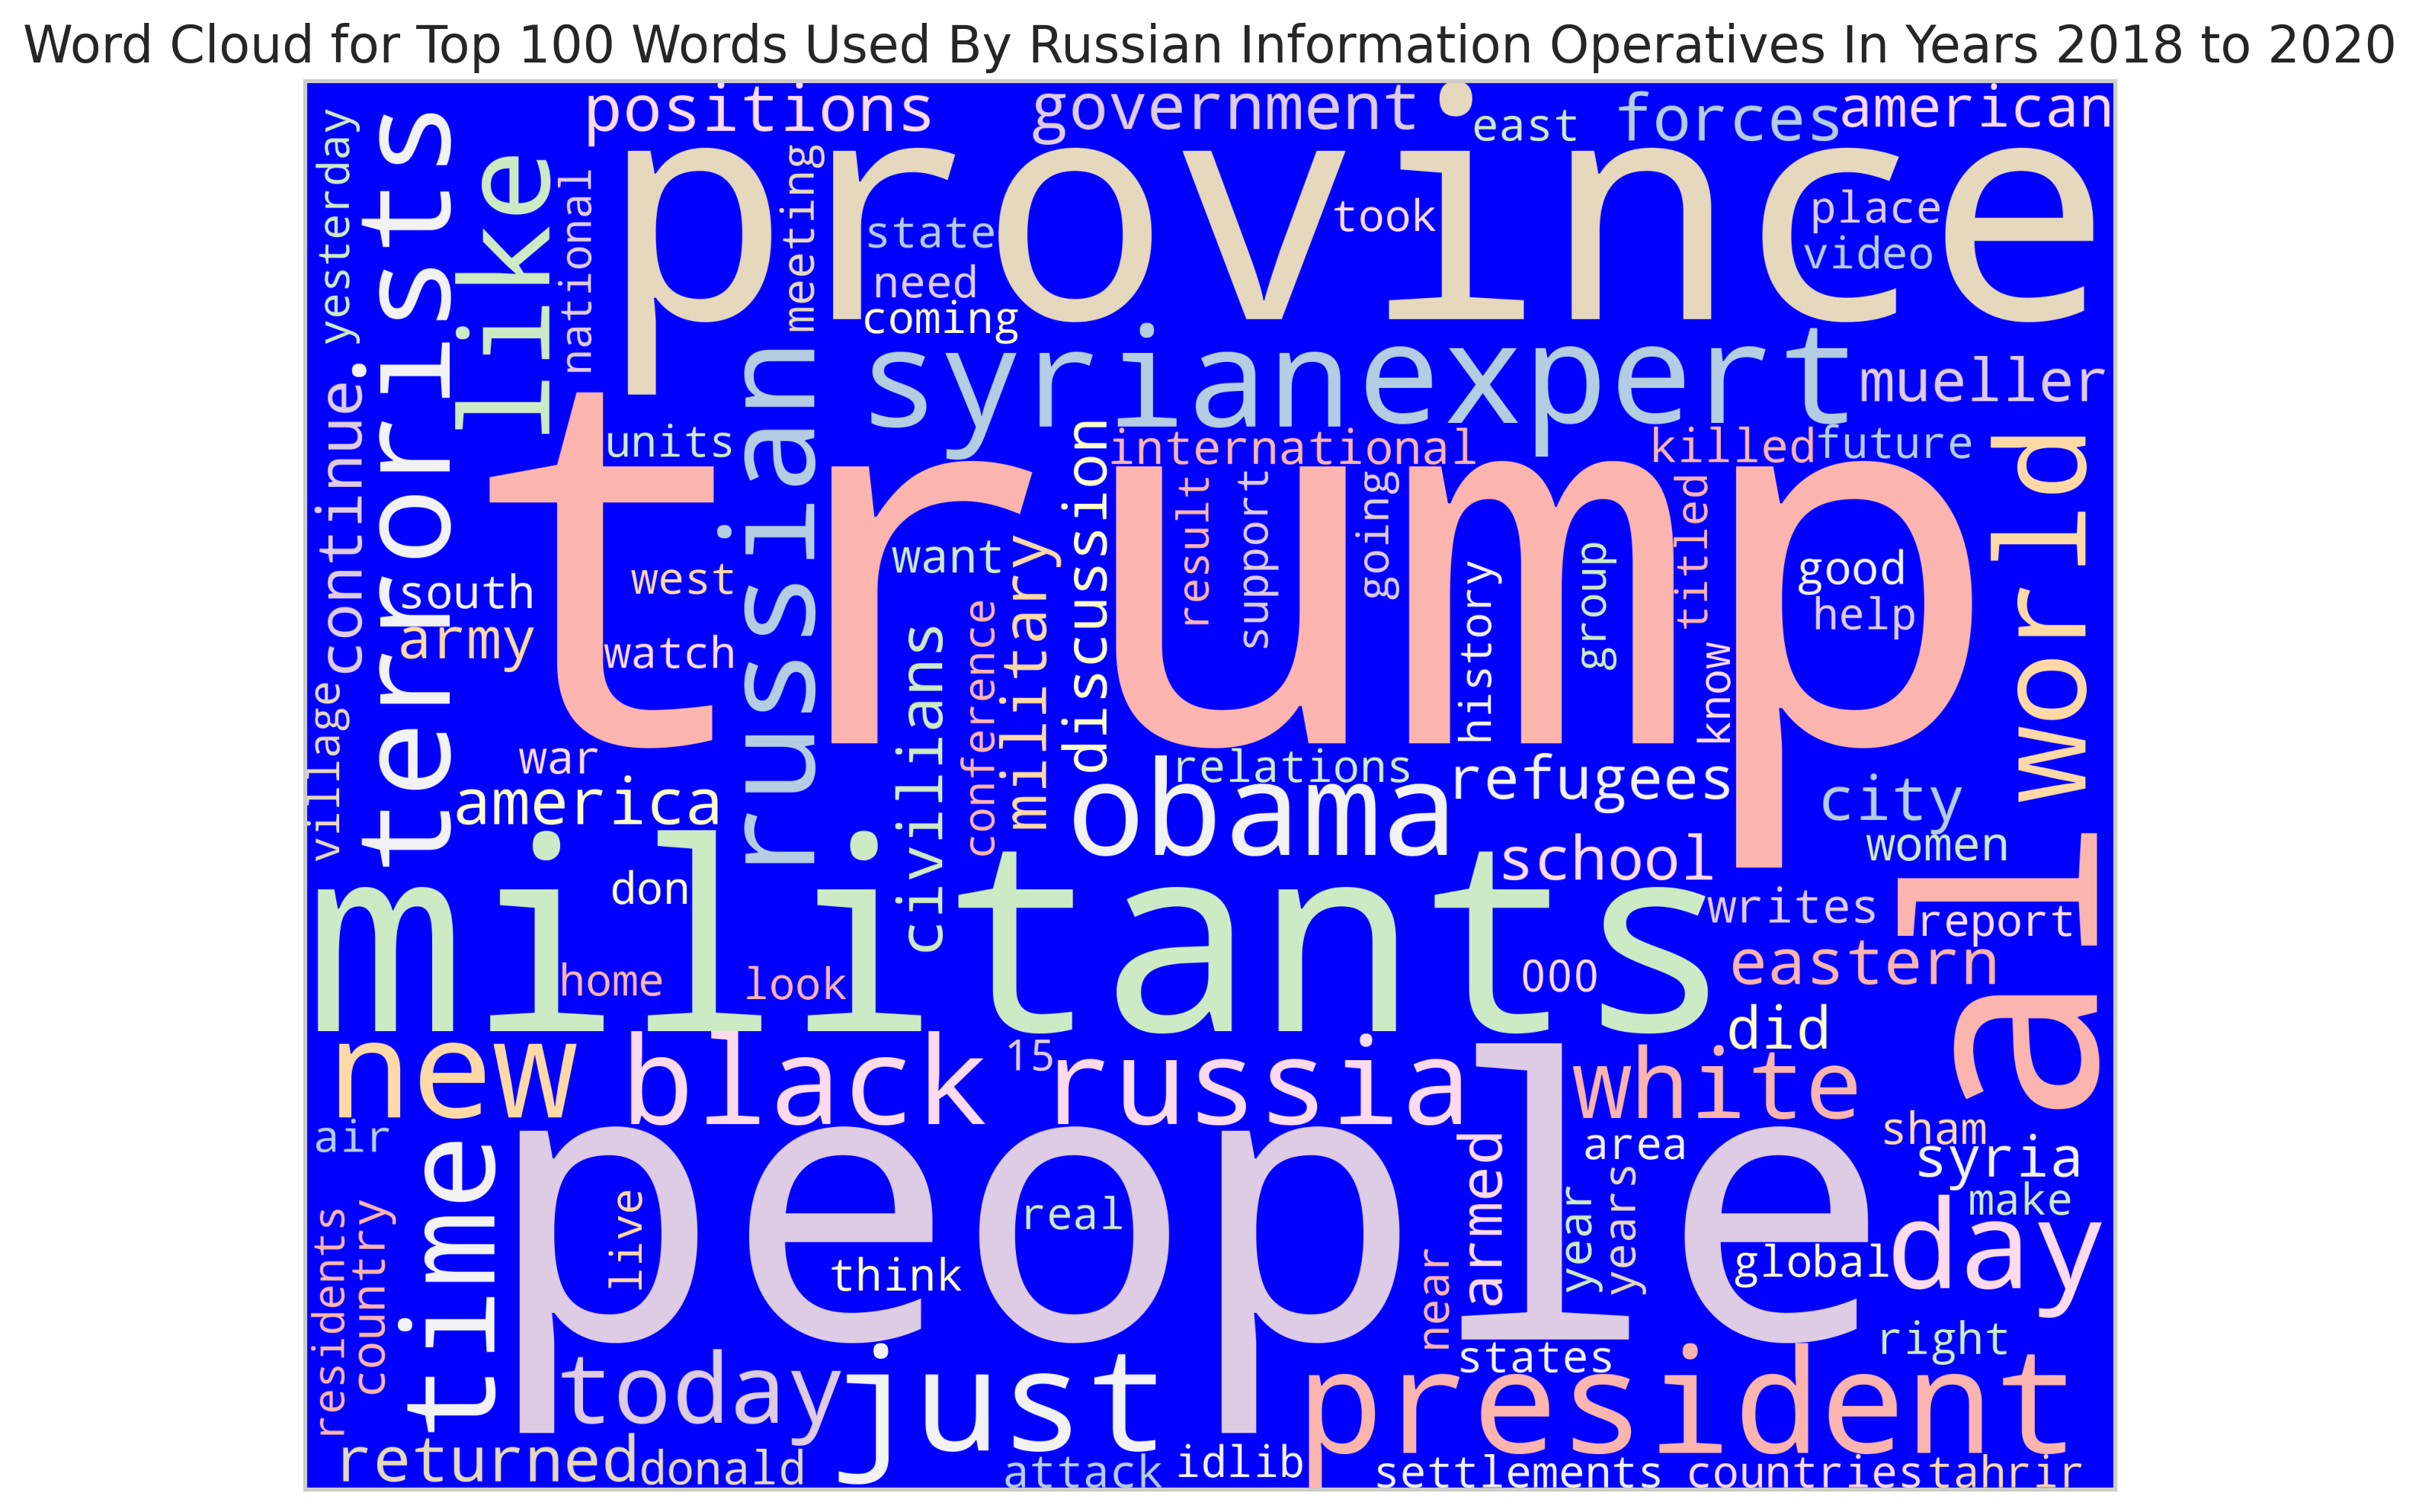

In [ ]:
periods = ['2009 to 2011', '2012 to 2014', '2015 to 2017', '2018 to 2020']
colors  = ['purple', 'green', 'orange', 'blue']

for i, df in enumerate(df_periods):
    tweet_text = df['clean_tweet_text']
    topic_word_feq = word_freq_tfidf(tweet_text[:2000])

    period = periods[i]

    plot_wordcloud(topic_word_feq, colors[i], 'Pastel1', 100,
               f'Word Cloud for Top 100 Words Used By Russian Information Operatives In Years {period}',
               3, 18, 8, plot_path + f'RU_topic_evol_{period}.png')

We will load the cleaned dataframe here. Due to the limitations of Google Colab, we can only select a small fraction of the total cleaned tweets to perform topic modelling.

## Top 10 Words Used Most Frequently

Word frequency distribution plot

In [ ]:
# there will be some rows that will be nan after all of the cleaning. We drop them
df_select = df_select.dropna(subset = ['clean_tweet_text'])

# we select a subset of the select dataframe
df_select = df_select.sample(frac = 0.1, random_state = 93)

print('Length of subdataframe for data viz:', len(df_select))
df_select.head(2)

Length of subdataframe for data viz: 190928


tweet_text  \
782667  RT @Msblerdess: If you didn't follow along today. Myself &amp; @BlackGirlNerds will be back at for #sxsw2017 #bgnsxsw. Get ready y'all. https:/…   
422520                                                                        #news #Chicago Martin Brodeur To Retire, Join St. Louis Blues Front Office   

                   hashtags  \
782667  [sxsw2017, bgnsxsw]   
422520      [news, Chicago]   

                                                                           clean_tweet_text  
782667  if you didn't follow along today. myself ;  will be back at for  . get ready y'all.  
422520                          martin brodeur to retire, join st. louis blues front office

In [ ]:
ru_clean_tweet_text = df_select['clean_tweet_text'].to_list()

Similarly in the utilities module, we have define some functions that we will be using to plot the data visualizations. We generate the word frequencies from using the tfidf function. As an example, let us print the top 10 words with the highest tdidf scores.

In [ ]:
word_feq = word_freq_tfidf(ru_clean_tweet_text[:2000])
word_feq[:10]

trump     22.973596
don       17.005750
people    14.794318
like      14.292420
love      14.266745
new       13.802587
right     12.512337
just      12.402291
today     12.378580
time      11.718336
dtype: float64

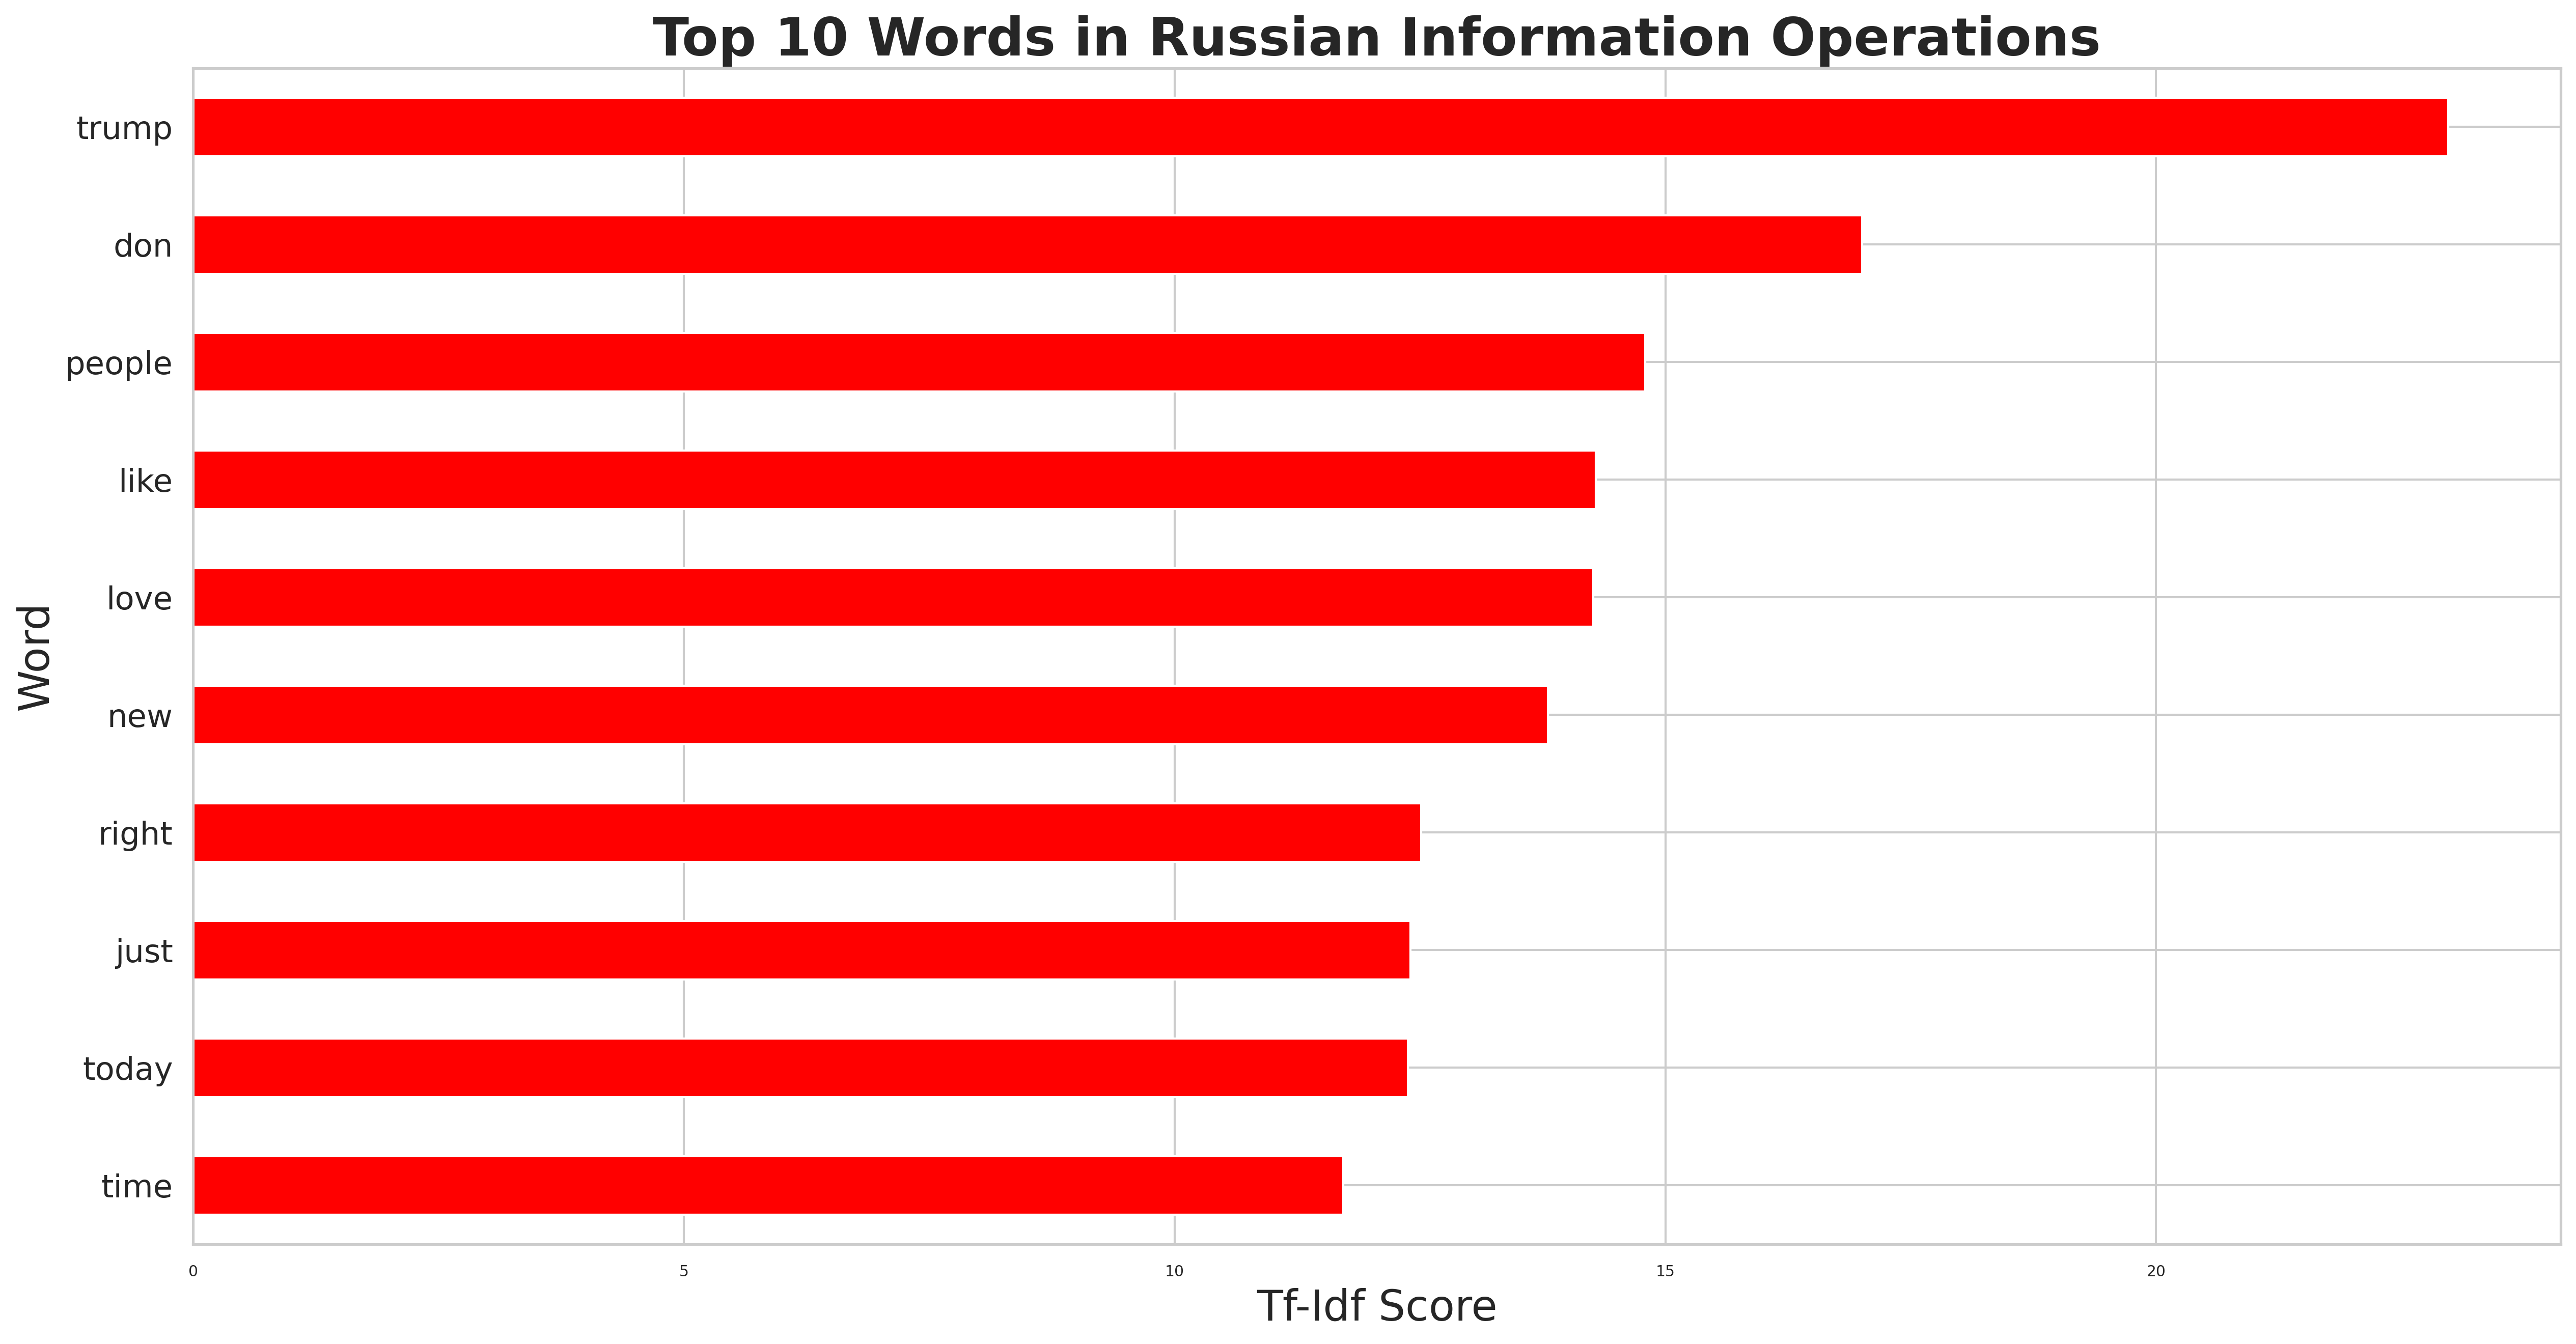

In [ ]:
word_distribution(word_feq, 10, 'red', 1, (20, 10),
                  'Top 10 Words in Russian Information Operations',
                  'Tf-Idf Score',
                  'Word',
                   plot_path + 'RU_word_frequency.png')

## Topic Modelling

Topic modelling refers to the clustering of topics and common themes the state actors commonly use. We can use the package BERTopic to achieve  this objective.

In [ ]:
# set up BERTopic model
topic_model      = BERTopic(verbose = True)
topics_ru, probs = topic_model.fit_transform(ru_clean_tweet_text)

2024-03-16 09:59:01,848 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 5967/5967 [01:14<00:00, 79.78it/s] 
2024-03-16 10:00:21,837 - BERTopic - Embedding - Completed ✓
2024-03-16 10:00:21,838 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-16 10:03:10,864 - BERTopic - Dimensionality - Completed ✓
2024-03-16 10:03:10,869 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizer

We will plot and save a total of 200 topics that appear in the dataset.

In [ ]:
%%time
# Generate word cloud and save the topic word clouds
for i in range(200):
    topic_wordcloud(topic_model = topic_model, topic = i, country = 'RU', width = 15, height = 6, data_path = plot_path)

---
# **Evaluation**
---

We present a summary of the findings from our analysis above:

- Overall, Russian information operations display a great depth of sophistication in exploiting known societal grievance, to manipulate the populace against one another. This can be seen in the vast number of topics and angles that the trolls exploited to achieve this goal. The tweets spew by the trolls show a great depth of understanding and mastery of the existing sensitive topics, issues and social grievances of the US populace. The trolls are able to impersonate individuals with conflicting beliefs, and pit them against one another. Broadly speaking, the aim of Russian information operations is to spread distrust, sow hatred and inflame tensions within the US society, in an attempt to confuse and polarise the populace further.


- The first signs of Russian information operations took place actually back in 2009, which was the first year that troll accounts were created, and the first tweets were made. Howevwer, Russian operations against the US actually began in earnest in early 2015, which shows a very large spike in the number of troll accounts created by Russia. This observation could be explained that Russia was _"preparing the battlefield"_, in anticipation for the 2016 US Presidential Elections. Unsurprisingly, the time series graph for the number of tweets against time show that operatives activity was steadily increasing from 2015, reaching a peak in 2016, and all the way through 2018. This is interesting, because operations did not stop even after the election of Trump, but it continued throughout the first 2 years of the Trump administration.

- The operatives impersonate American citizens in their tweets, by taking on English names, and issues that US citizens hold dearly - such as freedom, gun rights, capitalism and freedom of speech. The accounts masquerade as news accounts, which can be seen by the top words used in the operatives' profile descriptions.  As mentioned, as troll operations reached a peak in 2016, there is no surprise that words such as **Trump**, **don** **right** appears most frequently in the operatives' tweets.

- Russian operations have shown to change over the years. From 2009 to 2011, the focus seem to be on Russia, the new minister, presidency etc, this can be seen from the multiple mentions of **russian**, **minister**, **russia**, **new**. The operatives at that time, could have used Twitter as a parroting mouthpiece to spread favorable news, and propaganda about Russia. From 2015 to 2017, we see that the focus has largely shifted to promoting pro-Trump rhetoric - words such as **trump**, **islam** and **police** appear most frequently. This could be references to the rise of islamophobia in the United States, as well as police's mistreatment of black suspects, which gave rise to the Black Lives Matter movement. Lastly, in the period from 208 to 2020, the focus was still on **trump**, but majority of the tweets seem to reflect the was against ISIS and terrorism, as shown by the prevalence of words such as **militants** and **terrorist**.
